In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
path = '/Users/utilisateur/Documents/Le_Wagon/Resilience/CDP-Cities-KPI.csv'
kpi = pd.read_csv(path)

In [4]:
kpi

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
..          ...                   ...             ...   
610         611                  2020           35874   
611         612                  2020           42178   
612         613                  2020          848129   
613         614                  2020           54632   
614         615                  2020          831674   

                                          Organization           City  \
0    Metropolitan Government of Nashville and David...      Nashville   
1                          Prefeitura de Fernandópolis  Fernandópolis   
2                                   Prefeitura Niterói        Niterói   
3                                       City of Gdynia         Gdynia   
4                                       City of Denver         Denver   
..                                                 ...            ...   
610                                    City of Phoenix        Phoenix   
611                    Distrito Metropolitano de Quito          Quito   
612                                            Esquías            NaN   
613                              Prefeitura de Caruaru        Caruaru   
614                              Município de Amarante       Amarante   

                      Country     CDP.Region First.Time.Discloser  Population  \
0    United States of America  North America                   No    692587.0   
1                      Brazil  Latin America                   No     68823.0   
2                      Brazil  Latin America                   No    513584.0   
3                      Poland         Europe                   No    246348.0   
4    United States of America  North America                   No    716492.0   
..                        ...            ...                  ...         ...   
610  United States of America  North America                   No   1660272.0   
611                   Ecuador  Latin America                   No   2239191.0   
612                  Honduras  Latin America                  Yes     18308.0   
613                    Brazil  Latin America                   No    314912.0   
614                  Portugal         Europe                   No     56217.0   

                 City.Location        Sustainability.Targets.Master.Planning  \
0     POINT (-86.7816 36.1627)                                           Yes   
1    POINT (-50.2475 -20.2858)  Intending to incorporate in the next 2 years   
2    POINT (-43.1184 -22.8928)                                           Yes   
3      POINT (18.5305 54.5189)                                           Yes   
4     POINT (-104.985 39.7376)                                           Yes   
..                         ...                                           ...   
610   POINT (-112.074 33.4484)                                           Yes   
611   POINT (-78.5167 -0.2333)                                           Yes   
612                        NaN                                   In progress   
613                        NaN  Intending to incorporate in the next 2 years   
614                        NaN                                   Do not know   

                        Risk.Assessment.Actions  Nb.Hazards.Type  \
0                                           Yes              3.0   
1    Intending to undertake in the next 2 years              2.0   
2                                           Yes              9.0   
3                                           Yes              5.0   
4                                           Yes              4.0   
..                                          ...              ...   
610                              

In [5]:
kpi_new = kpi.copy()

### Sustainability.Targets.Master.Planning

"Yes"=3, 
"In progress"=2,
"Intending to incorporate in the next 2 years"=1,
"Not intending to undertake"=0,
"Do not know"=0
"NaN"=0

In [6]:
def note_sustainability_target(x):
    if x == "Yes":
        return 3
    elif x == "In progress":
        return 2
    elif x =="Intending to incorporate in the next 2 years":
        return 1
    elif x == "Not intending to undertake":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [7]:
def minmax_sus(x):
    mini = 0
    maxi = 3
    return (x-mini)/(maxi-mini)

In [8]:
kpi_new['Sustainability.Targets.Master.Planning'] = kpi_new['Sustainability.Targets.Master.Planning'].apply(note_sustainability_target)

In [9]:
kpi_new['Sustainability.Targets.Master.Planning'] = kpi_new['Sustainability.Targets.Master.Planning'].apply(minmax_sus)

### Risk.Assessment.Actions","Adaptation.Plan" ...

"Yes"=3, 
"In progress"=2,
"Intending to undertake in the next 2 years"=1,
"Not intending to undertake"=0,
"Do not know"=0

In [10]:
def note_bunch(x):
    if x == "Yes":
        return 3
    elif x == "In progress":
        return 2
    elif x =="Intending to undertake in the next 2 years":
        return 1
    elif x == "Not intending to undertake":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [11]:
def minmax_bunch(x):
    mini = 0
    maxi = 3
    return (x-mini)/(maxi-mini)

In [12]:
bunch_col = ["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]
for i in bunch_col:
    kpi_new[i] = kpi_new[i].apply(note_sustainability_target)
    kpi_new[i] = kpi_new[i].apply(minmax_bunch)

In [13]:
kpi_new[["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]]

Risk.Assessment.Actions  Adaptation.Plan  City.Wide.Emissions.Inventory  \
0                        1.0         0.666667                       1.000000   
1                        0.0         0.000000                       1.000000   
2                        1.0         1.000000                       1.000000   
3                        1.0         1.000000                       0.000000   
4                        1.0         1.000000                       1.000000   
..                       ...              ...                            ...   
610                      1.0         1.000000                       1.000000   
611                      1.0         1.000000                       0.666667   
612                      1.0         0.000000                       0.000000   
613                      0.0         0.000000                       0.000000   
614                      1.0         1.000000                       0.000000   

     GHG.Emissions.Consumption  GHG.Emissions.External.Verification  \
0                          0.0                             0.000000   
1                          0.0                             0.000000   
2                          0.0                             1.000000   
3                          0.0                             0.000000   
4                          1.0                             0.666667   
..                         ...                                  ...   
610                        0.0                             0.000000   
611                        0.0                             0.000000   
612                        0.0                             0.000000   
613                        0.0                             0.000000   
614                        0.0                             0.000000   

     Emissions.Reductions.Mitigation.Planning  Opportunities.Collaboration  \
0                                    1.000000                          1.0   
1                                    0.000000                          1.0   
2                                    0.666667                          1.0   
3                                    1.000000                          0.0   
4                                    1.000000                          1.0   
..                                        ...                          ...   
610                                  0.666667                          1.0   
611                                  1.000000                          1.0   
612                                  0.000000                          0.0   
613                                  0.000000                          1.0   
614                                  0.000000                          0.0   

     Renewable.Energy.Target  Energy.Efficnecy.Target  \
0                   1.000000                 1.000000   
1                   0.666667                 0.666667   
2                   0.000000                 0.000000   
3                   1.000000                 0.000000   
4                   1.000000                 0.666667   
..                       ...                      ...   
610                 1.000000                 1.000000   
611                 0.666667                 0.666667   
612                 0.000000                 0.000000   
613                 0.000000                 0.000000   
614                 0.000000                 0.000000   

     Water.Resource.Management.strategy  
0                              0.000000  
1                              0.666667  
2                              1.000000  
3                              0.000000  
4                              0.000000  
..                                  ...  
610                            1.000000  
611                            1.000000  
612                            0.000000  
613                            1.000000  
614                            0.666667  

[615 rows x 10 columns]

### Low.Zero.Emission.Zone","Food.Consumption.Policies

"Yes" = 1
"No" = 0
"Do not know" =0
"NaN" = 0

In [14]:
def note_low_food(x):
    if x == "Yes":
        return 1
    elif x == "No":
        return 0
    elif x == "Do not know":
        return 0
    else:
        return 0

In [15]:
def minmax_binaire(x):
    mini = 0
    maxi = 1
    return (x-mini)/(maxi-mini)

In [16]:
kpi_new['Low.Zero.Emission.Zone'] = kpi_new['Low.Zero.Emission.Zone'].apply(note_low_food)

In [17]:
kpi_new['Low.Zero.Emission.Zone'] = kpi_new['Low.Zero.Emission.Zone'].apply(minmax_binaire)

In [18]:
kpi_new['Food.Consumption.Policies'] = kpi_new['Food.Consumption.Policies'].apply(note_low_food)

In [19]:
kpi_new['Food.Consumption.Policies']= kpi_new['Food.Consumption.Policies'].apply(minmax_binaire)

### GHG.Emissions.Reductions.Targets

"1"= "Base year emissions (absolute) target","Base year intensity target","Baseline scenario (business as usual) target","Fixed level target"
"0" = "No target"
"0" = "NaN"

In [20]:
def note_emi_red(x):
    if x == "Base year emissions (absolute) target":
        return 1
    elif x == "Base year intensity target":
        return 1
    elif x == "Baseline scenario (business as usual) target":
        return 1
    elif x == "Fixed level target":
        return 1
    elif x == "No target":
        return 0
    else:
        return 0

In [21]:
kpi_new['GHG.Emissions.Reductions.Targets'] = kpi_new['GHG.Emissions.Reductions.Targets'].apply(note_emi_red)

In [22]:
kpi_new['GHG.Emissions.Reductions.Targets'] = kpi_new['GHG.Emissions.Reductions.Targets'].apply(minmax_binaire)

### GHG.Emissions.Evolution

"2"="Decreased",
"1"=  "Stayed the same",
"0" = "Do not know","This is our first year of calculation", "Increased"
"0" = "NaN"

In [23]:
def note_emi_evo(x):
    if x == "Decreased":
        return 2
    elif x == "Stayed the same":
        return 1
    elif x == "Increased":
        return 0
    elif x == "Do not know":
        return 0
    elif x == "This is our first year of calculation":
        return 0
    else:
        return 0

In [24]:
def minmax_em_evo(x):
    mini = 0
    maxi = 2
    return (x-mini)/(maxi-mini)

In [25]:
kpi_new['GHG.Emissions.Evolution'] = kpi_new['GHG.Emissions.Evolution'].apply(note_emi_evo)

In [26]:
kpi_new['GHG.Emissions.Evolution'] = kpi_new['GHG.Emissions.Evolution'].apply(minmax_em_evo)

### Electricity.Source.Renewable

In [27]:
def minmax_energy(x):
    if np.isnan(x):
        x = 0
    mini = 0
    maxi = 100
    return (x-mini)/(maxi-mini)

In [28]:
kpi_new['Electricity.Source.Renewable'] = kpi_new['Electricity.Source.Renewable'].apply(minmax_energy)

## City.Readiness.Index

In [29]:
kpi_new['City.Readiness.Index']= kpi_new[["Sustainability.Targets.Master.Planning", "Risk.Assessment.Actions",
                                            "Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
                                            "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration",
                                            "Renewable.Energy.Target","Energy.Efficnecy.Target",
                                            "Water.Resource.Management.strategy","Low.Zero.Emission.Zone",
                                            "GHG.Emissions.Evolution","GHG.Emissions.Reductions.Targets",
                                            "Electricity.Source.Renewable", "Food.Consumption.Policies",
                                            "City.Wide.Emissions.Inventory"]].mean(axis =1)

In [30]:
kpi_new['City.Readiness.Index'].max(), kpi_new['City.Readiness.Index'].min()

(0.9496875, 0.0)

In [31]:
kpi_new[['City.Readiness.Index']]

City.Readiness.Index
0                0.674167
1                0.458333
2                0.604167
3                0.375000
4                0.788333
..                    ...
610              0.737292
611              0.743750
612              0.104167
613              0.270833
614              0.166667

[615 rows x 1 columns]

In [32]:
kpi_new.iloc[2][["Sustainability.Targets.Master.Planning", "Risk.Assessment.Actions",
                                            "Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
                                            "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration",
                                            "Renewable.Energy.Target","Energy.Efficnecy.Target",
                                            "Water.Resource.Management.strategy","Low.Zero.Emission.Zone",
                                            "GHG.Emissions.Evolution","GHG.Emissions.Reductions.Targets",
                                            "Electricity.Source.Renewable", "Food.Consumption.Policies",
                                            "City.Wide.Emissions.Inventory"]]

Sustainability.Targets.Master.Planning             1
Risk.Assessment.Actions                            1
Adaptation.Plan                                    1
GHG.Emissions.Consumption                          0
GHG.Emissions.External.Verification                1
Emissions.Reductions.Mitigation.Planning    0.666667
Opportunities.Collaboration                        1
Renewable.Energy.Target                            0
Energy.Efficnecy.Target                            0
Water.Resource.Management.strategy                 1
Low.Zero.Emission.Zone                             0
GHG.Emissions.Evolution                            0
GHG.Emissions.Reductions.Targets                   0
Electricity.Source.Renewable                       1
Food.Consumption.Policies                          1
City.Wide.Emissions.Inventory                      1
Name: 2, dtype: object

In [33]:
kpi_new

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
..          ...                   ...             ...   
610         611                  2020           35874   
611         612                  2020           42178   
612         613                  2020          848129   
613         614                  2020           54632   
614         615                  2020          831674   

                                          Organization           City  \
0    Metropolitan Government of Nashville and David...      Nashville   
1                          Prefeitura de Fernandópolis  Fernandópolis   
2                                   Prefeitura Niterói        Niterói   
3                                       City of Gdynia         Gdynia   
4                                       City of Denver         Denver   
..                                                 ...            ...   
610                                    City of Phoenix        Phoenix   
611                    Distrito Metropolitano de Quito          Quito   
612                                            Esquías            NaN   
613                              Prefeitura de Caruaru        Caruaru   
614                              Município de Amarante       Amarante   

                      Country     CDP.Region First.Time.Discloser  Population  \
0    United States of America  North America                   No    692587.0   
1                      Brazil  Latin America                   No     68823.0   
2                      Brazil  Latin America                   No    513584.0   
3                      Poland         Europe                   No    246348.0   
4    United States of America  North America                   No    716492.0   
..                        ...            ...                  ...         ...   
610  United States of America  North America                   No   1660272.0   
611                   Ecuador  Latin America                   No   2239191.0   
612                  Honduras  Latin America                  Yes     18308.0   
613                    Brazil  Latin America                   No    314912.0   
614                  Portugal         Europe                   No     56217.0   

                 City.Location  Sustainability.Targets.Master.Planning  \
0     POINT (-86.7816 36.1627)                                1.000000   
1    POINT (-50.2475 -20.2858)                                0.333333   
2    POINT (-43.1184 -22.8928)                                1.000000   
3      POINT (18.5305 54.5189)                                1.000000   
4     POINT (-104.985 39.7376)                                1.000000   
..                         ...                                     ...   
610   POINT (-112.074 33.4484)                                1.000000   
611   POINT (-78.5167 -0.2333)                                1.000000   
612                        NaN                                0.666667   
613                        NaN                                0.333333   
614                        NaN                                0.000000   

     Risk.Assessment.Actions  Nb.Hazards.Type  Hazards.Exposure.Level  \
0                        1.0              3.0                    41.0   
1                        0.0              2.0                    12.0   
2                        1.0              9.0                   121.0   
3                        1.0              5.0                     NaN   
4                        1.0              4.0                    65.0   
..                       ...              ...                     ...   
610                      1.0              5.0                    74.0 

### CSV to send to adri

In [34]:
kpi_csv = kpi_new[['Account.Number','City.Readiness.Index']]

kpi_csv.to_csv('/Users/utilisateur/Documents/Le_Wagon/Resilience/CRI.csv')

In [35]:
kpi_csv

Account.Number  City.Readiness.Index
0             49335              0.674167
1             60278              0.458333
2             57509              0.604167
3             60114              0.375000
4             32550              0.788333
..              ...                   ...
610           35874              0.737292
611           42178              0.743750
612          848129              0.104167
613           54632              0.270833
614          831674              0.166667

[615 rows x 2 columns]

## Adri's Vulnerability Index

In [36]:
vul_index = pd.read_csv('/Users/utilisateur/Documents/Le_Wagon/Resilience/vulnerability.csv')

In [37]:
vul_index

Account.Number  Vulnerability
0             49335       0.288826
1             60278       0.011364
2             57509       0.281250
3             60114       0.166667
4             32550       0.228220
..              ...            ...
610           35874       0.236742
611           42178       0.233674
612          848129       0.216402
613           54632       0.293939
614          831674       0.126667

[615 rows x 2 columns]

## Merge index

kpi_index = kpi_new.merge(vul_index,on = 'Account.Number', how='inner')

In [38]:
kpi_index = pd.concat([kpi_new, vul_index], axis = 1)

In [39]:
kpi_index

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
..          ...                   ...             ...   
610         611                  2020           35874   
611         612                  2020           42178   
612         613                  2020          848129   
613         614                  2020           54632   
614         615                  2020          831674   

                                          Organization           City  \
0    Metropolitan Government of Nashville and David...      Nashville   
1                          Prefeitura de Fernandópolis  Fernandópolis   
2                                   Prefeitura Niterói        Niterói   
3                                       City of Gdynia         Gdynia   
4                                       City of Denver         Denver   
..                                                 ...            ...   
610                                    City of Phoenix        Phoenix   
611                    Distrito Metropolitano de Quito          Quito   
612                                            Esquías            NaN   
613                              Prefeitura de Caruaru        Caruaru   
614                              Município de Amarante       Amarante   

                      Country     CDP.Region First.Time.Discloser  Population  \
0    United States of America  North America                   No    692587.0   
1                      Brazil  Latin America                   No     68823.0   
2                      Brazil  Latin America                   No    513584.0   
3                      Poland         Europe                   No    246348.0   
4    United States of America  North America                   No    716492.0   
..                        ...            ...                  ...         ...   
610  United States of America  North America                   No   1660272.0   
611                   Ecuador  Latin America                   No   2239191.0   
612                  Honduras  Latin America                  Yes     18308.0   
613                    Brazil  Latin America                   No    314912.0   
614                  Portugal         Europe                   No     56217.0   

                 City.Location  Sustainability.Targets.Master.Planning  \
0     POINT (-86.7816 36.1627)                                1.000000   
1    POINT (-50.2475 -20.2858)                                0.333333   
2    POINT (-43.1184 -22.8928)                                1.000000   
3      POINT (18.5305 54.5189)                                1.000000   
4     POINT (-104.985 39.7376)                                1.000000   
..                         ...                                     ...   
610   POINT (-112.074 33.4484)                                1.000000   
611   POINT (-78.5167 -0.2333)                                1.000000   
612                        NaN                                0.666667   
613                        NaN                                0.333333   
614                        NaN                                0.000000   

     Risk.Assessment.Actions  Nb.Hazards.Type  Hazards.Exposure.Level  \
0                        1.0              3.0                    41.0   
1                        0.0              2.0                    12.0   
2                        1.0              9.0                   121.0   
3                        1.0              5.0                     NaN   
4                        1.0              4.0                    65.0   
..                       ...              ...                     ...   
610                      1.0              5.0                    74.0 

In [40]:
kpi_index['Risk.Health.System'] = kpi_index['Risk.Health.System'].apply(note_low_food)

In [41]:
kpi_index['Risk.Health.System'] = kpi_index['Risk.Health.System'].apply(minmax_binaire)

In [42]:
def cleanan(x):
    if pd.isna(x):
        return 0
    else:
        return x

In [43]:
kpi_index['Potable.Water.Supply.Percent'] = kpi_index['Potable.Water.Supply.Percent'].apply(cleanan)

In [44]:
kpi_index['Potable.Water.Supply.Vulnerability'] = 100-kpi_index['Potable.Water.Supply.Percent']

In [45]:
kpi_index['Potable.Water.Supply.Vulnerability'] = kpi_index['Potable.Water.Supply.Vulnerability'].apply(minmax_energy)

In [46]:
def minmax_hazard(x):
    mini = 0
    maxi = 352
    return (x-mini)/(maxi-mini)

In [47]:
kpi_index['Hazards.Exposure.Level'] = kpi_index['Hazards.Exposure.Level'].apply(cleanan)

In [48]:
kpi_index['Hazards.Exposure.Level'] = kpi_index['Hazards.Exposure.Level'].apply(minmax_hazard)

In [49]:
def minmax_adaptation(x):
    mini = 0
    maxi = 8
    return (x-mini)/(maxi-mini)

In [50]:
kpi_index['Adaptation.Challenges.Level'] = kpi_index['Adaptation.Challenges.Level'].apply(cleanan)

In [51]:
kpi_index['Adaptation.Challenges.Index'] = kpi_index['Adaptation.Challenges.Level'].apply(minmax_adaptation)

## Initial DataFrame with the targets

In [52]:
city_index = pd.concat([kpi_csv, vul_index.drop('Account.Number', axis =1)], axis=1)

In [53]:
city_index

Account.Number  City.Readiness.Index  Vulnerability
0             49335              0.674167       0.288826
1             60278              0.458333       0.011364
2             57509              0.604167       0.281250
3             60114              0.375000       0.166667
4             32550              0.788333       0.228220
..              ...                   ...            ...
610           35874              0.737292       0.236742
611           42178              0.743750       0.233674
612          848129              0.104167       0.216402
613           54632              0.270833       0.293939
614          831674              0.166667       0.126667

[615 rows x 3 columns]

raw_index = kpi.merge(city_index, on = 'Account.Number', how = 'inner')

In [54]:
raw_index = pd.concat([kpi, city_index.drop('Account.Number', axis = 1)], axis =1 )

In [55]:
raw_index

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
..          ...                   ...             ...   
610         611                  2020           35874   
611         612                  2020           42178   
612         613                  2020          848129   
613         614                  2020           54632   
614         615                  2020          831674   

                                          Organization           City  \
0    Metropolitan Government of Nashville and David...      Nashville   
1                          Prefeitura de Fernandópolis  Fernandópolis   
2                                   Prefeitura Niterói        Niterói   
3                                       City of Gdynia         Gdynia   
4                                       City of Denver         Denver   
..                                                 ...            ...   
610                                    City of Phoenix        Phoenix   
611                    Distrito Metropolitano de Quito          Quito   
612                                            Esquías            NaN   
613                              Prefeitura de Caruaru        Caruaru   
614                              Município de Amarante       Amarante   

                      Country     CDP.Region First.Time.Discloser  Population  \
0    United States of America  North America                   No    692587.0   
1                      Brazil  Latin America                   No     68823.0   
2                      Brazil  Latin America                   No    513584.0   
3                      Poland         Europe                   No    246348.0   
4    United States of America  North America                   No    716492.0   
..                        ...            ...                  ...         ...   
610  United States of America  North America                   No   1660272.0   
611                   Ecuador  Latin America                   No   2239191.0   
612                  Honduras  Latin America                  Yes     18308.0   
613                    Brazil  Latin America                   No    314912.0   
614                  Portugal         Europe                   No     56217.0   

                 City.Location        Sustainability.Targets.Master.Planning  \
0     POINT (-86.7816 36.1627)                                           Yes   
1    POINT (-50.2475 -20.2858)  Intending to incorporate in the next 2 years   
2    POINT (-43.1184 -22.8928)                                           Yes   
3      POINT (18.5305 54.5189)                                           Yes   
4     POINT (-104.985 39.7376)                                           Yes   
..                         ...                                           ...   
610   POINT (-112.074 33.4484)                                           Yes   
611   POINT (-78.5167 -0.2333)                                           Yes   
612                        NaN                                   In progress   
613                        NaN  Intending to incorporate in the next 2 years   
614                        NaN                                   Do not know   

                        Risk.Assessment.Actions  Nb.Hazards.Type  \
0                                           Yes              3.0   
1    Intending to undertake in the next 2 years              2.0   
2                                           Yes              9.0   
3                                           Yes              5.0   
4                                           Yes              4.0   
..                                          ...              ...   
610                              

## Feature importance

#####Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

In [56]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression

hazard.exposure.level
adaptation.challenges.level
risk.health.system
potable.water.supply.percent

X = kpi_index[['Potable.Water.Supply.Percent','Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Index', 
               'Adaptation.Challenges.Level','Potable.Water.Supply.Vulnerability', "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory" ]]

In [57]:
dummy_kpi = kpi_index.copy()
dummy_kpi['Dummy_Index'] = (dummy_kpi['Vulnerability'] + dummy_kpi['City.Readiness.Index'])/2

In [58]:
X = kpi_index[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Index','Potable.Water.Supply.Vulnerability', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory" ]]

In [59]:
kpi_index.columns

Index(['Unnamed: 0', 'Year.Reported.to.CDP', 'Account.Number', 'Organization',
       'City', 'Country', 'CDP.Region', 'First.Time.Discloser', 'Population',
       'City.Location', 'Sustainability.Targets.Master.Planning',
       'Risk.Assessment.Actions', 'Nb.Hazards.Type', 'Hazards.Exposure.Level',
       'Adaptation.Challenges.Health', 'Adaptation.Challenges.Economic',
       'Adaptation.Challenges.Environment',
       'Adaptation.Challenges.Infrastructure', 'Adaptation.Challenges.Social',
       'Adaptation.Challenges.Governance', 'Adaptation.Challenges.Education',
       'Adaptation.Challenges.Level', 'Risk.Health.System',
       'Nb.Adaptation.Actions', 'Adaptation.Plan',
       'City.Wide.Emissions.Inventory', 'GHG.Emissions.Primary.protocol',
       'GHG.Emissions.Evolution', 'GHG.Emissions.Consumption',
       'GHG.Emissions.External.Verification',
       'GHG.Emissions.Reductions.Targets',
       'Emissions.Reductions.Mitigation.Planning',
       'Opportunities.Collaboration'

In [60]:
X.shape

(615, 20)

In [61]:
y1 = kpi_index['Vulnerability']
y2 = kpi_index['City.Readiness.Index']

Feature: 0, Score: 0.33333 Hazards.Exposure.Level
Feature: 1, Score: 0.16667 Risk.Health.System
Feature: 2, Score: 0.33333 Adaptation.Challenges.Index
Feature: 3, Score: 0.16667 Potable.Water.Supply.Vulnerability
Feature: 4, Score: -0.00000 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.00000 Risk.Assessment.Actions
Feature: 6, Score: -0.00000 Adaptation.Plan
Feature: 7, Score: -0.00000 GHG.Emissions.Consumption
Feature: 8, Score: 0.00000 GHG.Emissions.External.Verification
Feature: 9, Score: -0.00000 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.00000 Opportunities.Collaboration
Feature: 11, Score: -0.00000 Renewable.Energy.Target
Feature: 12, Score: 0.00000 Energy.Efficnecy.Target
Feature: 13, Score: -0.00000 Water.Resource.Management.strategy
Feature: 14, Score: -0.00000 Low.Zero.Emission.Zone
Feature: 15, Score: -0.00000 GHG.Emissions.Evolution
Feature: 16, Score: 0.00000 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.00000 Electricity.Source.R

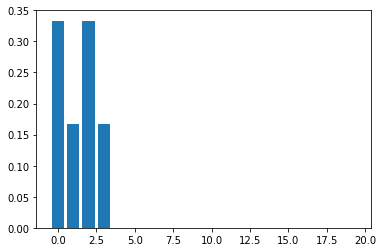

In [62]:
model = LinearRegression()
# fit the model
model.fit(X, y1)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: -0.00000 Hazards.Exposure.Level
Feature: 1, Score: -0.00000 Risk.Health.System
Feature: 2, Score: 0.00000 Adaptation.Challenges.Index
Feature: 3, Score: 0.00000 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.06250 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.06250 Risk.Assessment.Actions
Feature: 6, Score: 0.06250 Adaptation.Plan
Feature: 7, Score: 0.06250 GHG.Emissions.Consumption
Feature: 8, Score: 0.06250 GHG.Emissions.External.Verification
Feature: 9, Score: 0.06250 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.06250 Opportunities.Collaboration
Feature: 11, Score: 0.06250 Renewable.Energy.Target
Feature: 12, Score: 0.06250 Energy.Efficnecy.Target
Feature: 13, Score: 0.06250 Water.Resource.Management.strategy
Feature: 14, Score: 0.06250 Low.Zero.Emission.Zone
Feature: 15, Score: 0.06250 GHG.Emissions.Evolution
Feature: 16, Score: 0.06250 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.06250 Electricity.Source.Renewab

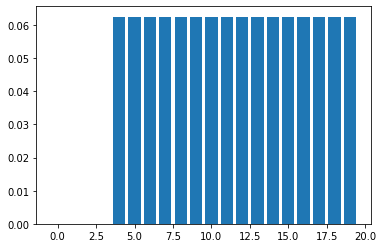

In [63]:
model = LinearRegression()
# fit the model
model.fit(X, y2)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

!pip install xgboost

conda install -c anaconda py-xgboost

In [64]:
from xgboost import XGBRegressor

[15:37:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.03438 Hazards.Exposure.Level
Feature: 1, Score: 0.81435 Risk.Health.System
Feature: 2, Score: 0.08574 Adaptation.Challenges.Index
Feature: 3, Score: 0.05730 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.00020 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.00020 Risk.Assessment.Actions
Feature: 6, Score: 0.00000 Adaptation.Plan
Feature: 7, Score: 0.00000 GHG.Emissions.Consumption
Feature: 8, Score: 0.00049 GHG.Emissions.External.Verification
Feature: 9, Score: 0.00000 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.00013 Opportunities.Collaboration
Feature: 11, Score: 0.00073 Renewable.Energy.Target
Feature: 12, Score: 0.00263 Energy.Efficnecy.Target
Feature: 13, Score: 0.00000 Water.Resource.Management.strategy
Feature: 14, Score: 0.00000 Low.Zero.Emission.Zone
Feature: 15, Score: 0.00000 GHG.Emissions.Evolution
F

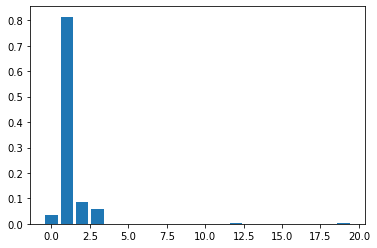

In [65]:
model = XGBRegressor()
# fit the model
model.fit(X, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

[15:37:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00021 Hazards.Exposure.Level
Feature: 1, Score: 0.00044 Risk.Health.System
Feature: 2, Score: 0.00006 Adaptation.Challenges.Index
Feature: 3, Score: 0.00020 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.01451 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.02994 Risk.Assessment.Actions
Feature: 6, Score: 0.08501 Adaptation.Plan
Feature: 7, Score: 0.01186 GHG.Emissions.Consumption
Feature: 8, Score: 0.02175 GHG.Emissions.External.Verification
Feature: 9, Score: 0.23450 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.05268 Opportunities.Collaboration
Feature: 11, Score: 0.09030 Renewable.Energy.Target
Feature: 12, Score: 0.06848 Energy.Efficnecy.Target
Feature: 13, Score: 0.01997 Water.Resource.Management.strategy
Feature: 14, Score: 0.00897 Low.Zero.Emission.Zone
Feature: 15, Score: 0.05012 GHG.Emissions.Evolution
F

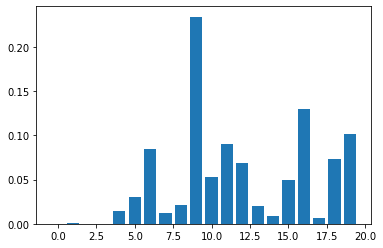

In [66]:
model = XGBRegressor()
# fit the model
model.fit(X, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v),f'{X.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [67]:
X_dummy = dummy_kpi[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Index','Potable.Water.Supply.Vulnerability', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory" ]]
y_dummy = dummy_kpi['Dummy_Index']

Feature: 0, Score: 0.16667 Hazards.Exposure.Level
Feature: 1, Score: 0.08333 Risk.Health.System
Feature: 2, Score: 0.16667 Adaptation.Challenges.Index
Feature: 3, Score: 0.08333 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.03125 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.03125 Risk.Assessment.Actions
Feature: 6, Score: 0.03125 Adaptation.Plan
Feature: 7, Score: 0.03125 GHG.Emissions.Consumption
Feature: 8, Score: 0.03125 GHG.Emissions.External.Verification
Feature: 9, Score: 0.03125 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.03125 Opportunities.Collaboration
Feature: 11, Score: 0.03125 Renewable.Energy.Target
Feature: 12, Score: 0.03125 Energy.Efficnecy.Target
Feature: 13, Score: 0.03125 Water.Resource.Management.strategy
Feature: 14, Score: 0.03125 Low.Zero.Emission.Zone
Feature: 15, Score: 0.03125 GHG.Emissions.Evolution
Feature: 16, Score: 0.03125 GHG.Emissions.Reductions.Targets
Feature: 17, Score: 0.03125 Electricity.Source.Renewable

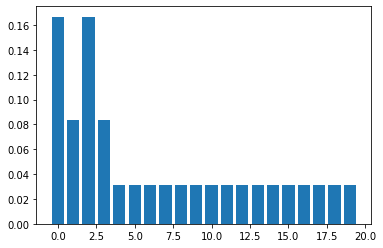

In [68]:
model = LinearRegression()
# fit the model
model.fit(X_dummy, y_dummy)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

[15:37:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00751 Hazards.Exposure.Level
Feature: 1, Score: 0.21077 Risk.Health.System
Feature: 2, Score: 0.01113 Adaptation.Challenges.Index
Feature: 3, Score: 0.00280 Potable.Water.Supply.Vulnerability
Feature: 4, Score: 0.01020 Sustainability.Targets.Master.Planning
Feature: 5, Score: 0.01964 Risk.Assessment.Actions
Feature: 6, Score: 0.10223 Adaptation.Plan
Feature: 7, Score: 0.00639 GHG.Emissions.Consumption
Feature: 8, Score: 0.01005 GHG.Emissions.External.Verification
Feature: 9, Score: 0.19390 Emissions.Reductions.Mitigation.Planning
Feature: 10, Score: 0.02267 Opportunities.Collaboration
Feature: 11, Score: 0.04618 Renewable.Energy.Target
Feature: 12, Score: 0.05703 Energy.Efficnecy.Target
Feature: 13, Score: 0.00955 Water.Resource.Management.strategy
Feature: 14, Score: 0.00492 Low.Zero.Emission.Zone
Feature: 15, Score: 0.03293 GHG.Emissions.Evolution
F

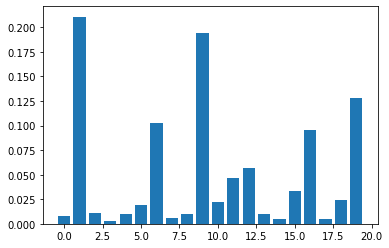

In [69]:
model = XGBRegressor()
# fit the model
model.fit(X_dummy, y_dummy)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v), f'{X_dummy.columns[i]}')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [70]:
from sklearn.compose import make_column_selector

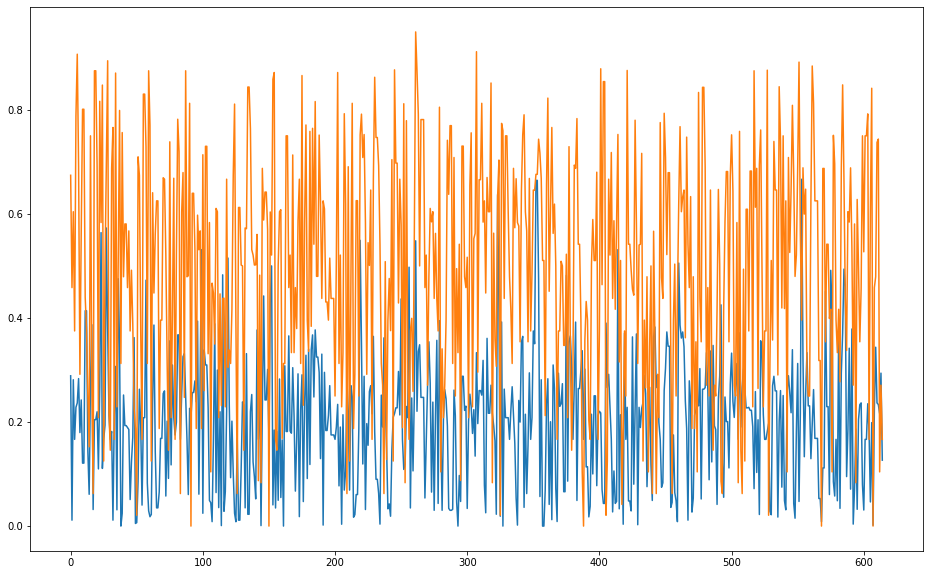

In [71]:
plt.figure(figsize=(16,10))
plt.plot(city_index[['Vulnerability','City.Readiness.Index']])

In [72]:
import plotly.express as px

In [73]:
px.scatter(kpi_index, x = 'City.Readiness.Index', y = 'Vulnerability', hover_data=['Organization'])

In [74]:
kpi_index[kpi_index['Organization'] == 'Ramallah']

Unnamed: 0  Year.Reported.to.CDP  Account.Number Organization City  \
529         530                  2020          831926     Ramallah  NaN   

                Country   CDP.Region First.Time.Discloser  Population  \
529  State of Palestine  Middle East                   No     66000.0   

    City.Location  Sustainability.Targets.Master.Planning  \
529           NaN                                0.666667   

     Risk.Assessment.Actions  Nb.Hazards.Type  Hazards.Exposure.Level  \
529                      0.0              5.0                0.085227   

     Adaptation.Challenges.Health  Adaptation.Challenges.Economic  \
529                           NaN                             NaN   

     Adaptation.Challenges.Environment  Adaptation.Challenges.Infrastructure  \
529                                NaN                                   NaN   

     Adaptation.Challenges.Social  Adaptation.Challenges.Governance  \
529                           NaN                               NaN   

     Adaptation.Challenges.Education  Adaptation.Challenges.Level  \
529                              NaN                          0.0   

     Risk.Health.System  Nb.Adaptation.Actions  Adaptation.Plan  \
529                 0.0                      5              1.0   

     City.Wide.Emissions.Inventory GHG.Emissions.Primary.protocol  \
529                            0.0                            NaN   

     GHG.Emissions.Evolution  GHG.Emissions.Consumption  \
529                      0.0                        0.0   

     GHG.Emissions.External.Verification  GHG.Emissions.Reductions.Targets  \
529                                  0.0                               0.0   

     Emissions.Reductions.Mitigation.Planning  Opportunities.Collaboration  \
529                                  0.666667                          1.0   

     Renewable.Energy.Target  Electricity.Source.Biomass  \
529                      1.0                         NaN   

     Electricity.Source.Coal  Electricity.Source.Gas  \
529                      NaN                     NaN   

     Electricity.Source.Geothermal  Electricity.Source.Hydro  \
529                            NaN                       NaN   

     Electricity.Source.Nuclear  Electricity.Source.Oil  \
529                         NaN                     NaN   

     Electricity.Source.Other  Electricity.Source.Solar  \
529                       NaN                       NaN   

     Electricity.Source.Wind  Electricity.Source.Renewable  \
529                      NaN                           0.0   

     Energy.Efficnecy.Target  Transport.Mode.Passenger.Public  \
529                 0.666667                              NaN   

     Transport.Mode.Passenger.Cycling  Transport.Mode.Passenger.Other  \
529                               NaN                             NaN   

     Transport.Mode.Passenger.Private.motorized  \
529                                         NaN   

     Transport.Mode.Passenger.Walking  Low.Zero.Emission.Zone  \
529                               NaN                     0.0   

     Food.Consumption.Policies  Potable.Water.Supply.Percent  \
529                        0.0                         100.0   

     Water.Resource.Management.strategy        lat       long Country.Code.3  \
529                                 0.0  31.903054  35.195225            PSE   

     City.Readiness.Index  Account.Number  Vulnerability  \
529                0.3125          831926       0.028409   

     Potable.Water.Supply.Vulnerability  Adaptation.Challenges.Index  
529                                 0.0                          0.0

In [75]:
kpi[kpi['Organization'] == 'Ramallah']

Unnamed: 0  Year.Reported.to.CDP  Account.Number Organization City  \
529         530                  2020          831926     Ramallah  NaN   

                Country   CDP.Region First.Time.Discloser  Population  \
529  State of Palestine  Middle East                   No     66000.0   

    City.Location Sustainability.Targets.Master.Planning  \
529           NaN                            In progress   

                        Risk.Assessment.Actions  Nb.Hazards.Type  \
529  Intending to undertake in the next 2 years              5.0   

     Hazards.Exposure.Level  Adaptation.Challenges.Health  \
529                    30.0                           NaN   

     Adaptation.Challenges.Economic  Adaptation.Challenges.Environment  \
529                             NaN                                NaN   

     Adaptation.Challenges.Infrastructure  Adaptation.Challenges.Social  \
529                                   NaN                           NaN   

     Adaptation.Challenges.Governance  Adaptation.Challenges.Education  \
529                               NaN                              NaN   

     Adaptation.Challenges.Level Risk.Health.System  Nb.Adaptation.Actions  \
529                          NaN                NaN                      5   

    Adaptation.Plan City.Wide.Emissions.Inventory  \
529             Yes    Not intending to undertake   

    GHG.Emissions.Primary.protocol GHG.Emissions.Evolution  \
529                            NaN                     NaN   

    GHG.Emissions.Consumption GHG.Emissions.External.Verification  \
529                       NaN                                 NaN   

    GHG.Emissions.Reductions.Targets Emissions.Reductions.Mitigation.Planning  \
529                        No target                              In progress   

    Opportunities.Collaboration Renewable.Energy.Target  \
529                         Yes                     Yes   

     Electricity.Source.Biomass  Electricity.Source.Coal  \
529                         NaN                      NaN   

     Electricity.Source.Gas  Electricity.Source.Geothermal  \
529                     NaN                            NaN   

     Electricity.Source.Hydro  Electricity.Source.Nuclear  \
529                       NaN                         NaN   

     Electricity.Source.Oil  Electricity.Source.Other  \
529                     NaN                       NaN   

     Electricity.Source.Solar  Electricity.Source.Wind  \
529                       NaN                      NaN   

     Electricity.Source.Renewable Energy.Efficnecy.Target  \
529                           NaN             In progress   

     Transport.Mode.Passenger.Public  Transport.Mode.Passenger.Cycling  \
529                              NaN                               NaN   

     Transport.Mode.Passenger.Other  \
529                             NaN   

     Transport.Mode.Passenger.Private.motorized  \
529                                         NaN   

     Transport.Mode.Passenger.Walking Low.Zero.Emission.Zone  \
529                               NaN                     No   

    Food.Consumption.Policies  Potable.Water.Supply.Percent  \
529                        No                         100.0   

    Water.Resource.Management.strategy        lat       long Country.Code.3  
529         Not intending to undertake  31.903054  35.195225            PSE

In [76]:
raw_index['Nb.Hazards.Type'].value_counts(dropna=False)

4.0     96
3.0     91
5.0     78
2.0     66
1.0     65
6.0     62
7.0     34
NaN     30
8.0     23
9.0     20
10.0    14
11.0     8
12.0     7
13.0     7
15.0     4
14.0     2
36.0     2
16.0     2
17.0     1
35.0     1
18.0     1
32.0     1
Name: Nb.Hazards.Type, dtype: int64

In [77]:
raw_index['Adaptation.Challenges.Level'].value_counts(dropna=False)

NaN    421
1.0     83
2.0     64
3.0     24
4.0      8
5.0      6
6.0      5
7.0      3
8.0      1
Name: Adaptation.Challenges.Level, dtype: int64

In [78]:
raw_index.shape

(615, 60)

## Duplicates Analysis

In [79]:
raw_index

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
0             1                  2020           49335   
1             2                  2020           60278   
2             3                  2020           57509   
3             4                  2020           60114   
4             5                  2020           32550   
..          ...                   ...             ...   
610         611                  2020           35874   
611         612                  2020           42178   
612         613                  2020          848129   
613         614                  2020           54632   
614         615                  2020          831674   

                                          Organization           City  \
0    Metropolitan Government of Nashville and David...      Nashville   
1                          Prefeitura de Fernandópolis  Fernandópolis   
2                                   Prefeitura Niterói        Niterói   
3                                       City of Gdynia         Gdynia   
4                                       City of Denver         Denver   
..                                                 ...            ...   
610                                    City of Phoenix        Phoenix   
611                    Distrito Metropolitano de Quito          Quito   
612                                            Esquías            NaN   
613                              Prefeitura de Caruaru        Caruaru   
614                              Município de Amarante       Amarante   

                      Country     CDP.Region First.Time.Discloser  Population  \
0    United States of America  North America                   No    692587.0   
1                      Brazil  Latin America                   No     68823.0   
2                      Brazil  Latin America                   No    513584.0   
3                      Poland         Europe                   No    246348.0   
4    United States of America  North America                   No    716492.0   
..                        ...            ...                  ...         ...   
610  United States of America  North America                   No   1660272.0   
611                   Ecuador  Latin America                   No   2239191.0   
612                  Honduras  Latin America                  Yes     18308.0   
613                    Brazil  Latin America                   No    314912.0   
614                  Portugal         Europe                   No     56217.0   

                 City.Location        Sustainability.Targets.Master.Planning  \
0     POINT (-86.7816 36.1627)                                           Yes   
1    POINT (-50.2475 -20.2858)  Intending to incorporate in the next 2 years   
2    POINT (-43.1184 -22.8928)                                           Yes   
3      POINT (18.5305 54.5189)                                           Yes   
4     POINT (-104.985 39.7376)                                           Yes   
..                         ...                                           ...   
610   POINT (-112.074 33.4484)                                           Yes   
611   POINT (-78.5167 -0.2333)                                           Yes   
612                        NaN                                   In progress   
613                        NaN  Intending to incorporate in the next 2 years   
614                        NaN                                   Do not know   

                        Risk.Assessment.Actions  Nb.Hazards.Type  \
0                                           Yes              3.0   
1    Intending to undertake in the next 2 years              2.0   
2                                           Yes              9.0   
3                                           Yes              5.0   
4                                           Yes              4.0   
..                                          ...              ...   
610                              

In [80]:
raw_index['Account.Number'].nunique()

566

In [81]:
duplicateRowsDF = raw_index[raw_index['Account.Number'].duplicated()]

In [82]:
[duplicateRowsDF['City']=='Bristol']

[10     False
 12     False
 19     False
 42     False
 56      True
 66     False
 69     False
 82     False
 93     False
 103    False
 128    False
 135    False
 148    False
 164    False
 187    False
 194    False
 198    False
 199    False
 217    False
 232    False
 247    False
 266    False
 267    False
 288    False
 297    False
 310    False
 317    False
 330    False
 353    False
 358    False
 374    False
 385    False
 397    False
 404    False
 423    False
 453    False
 479    False
 497    False
 512    False
 515    False
 526    False
 534    False
 559    False
 564    False
 565    False
 567    False
 570    False
 573    False
 602    False
 Name: City, dtype: bool]

In [83]:
raw_index[raw_index['City']=='Nanjing']

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
68          69                  2020           60546   
69          70                  2020           60546   

                             Organization     City Country CDP.Region  \
68  Nanjing Municipal People's Government  Nanjing   China  East Asia   
69  Nanjing Municipal People's Government  Nanjing   China  East Asia   

   First.Time.Discloser  Population            City.Location  \
68                   No   8500000.0  POINT (118.797 32.0603)   
69                   No   8500000.0  POINT (118.797 32.0603)   

   Sustainability.Targets.Master.Planning     Risk.Assessment.Actions  \
68                                    Yes  Not intending to undertake   
69                                    Yes  Not intending to undertake   

    Nb.Hazards.Type  Hazards.Exposure.Level  Adaptation.Challenges.Health  \
68              2.0                     2.0                           NaN   
69              2.0                     2.0                           NaN   

    Adaptation.Challenges.Economic  Adaptation.Challenges.Environment  \
68                             NaN                                NaN   
69                             NaN                                NaN   

    Adaptation.Challenges.Infrastructure  Adaptation.Challenges.Social  \
68                                   NaN                           NaN   
69                                   NaN                           NaN   

    Adaptation.Challenges.Governance  Adaptation.Challenges.Education  \
68                               NaN                              NaN   
69                               NaN                              NaN   

    Adaptation.Challenges.Level Risk.Health.System  Nb.Adaptation.Actions  \
68                          NaN                NaN                     12   
69                          NaN                NaN                     12   

   Adaptation.Plan City.Wide.Emissions.Inventory  \
68             NaN                   In progress   
69             NaN                   In progress   

   GHG.Emissions.Primary.protocol GHG.Emissions.Evolution  \
68           2006 IPCC Guidelines                     NaN   
69           2006 IPCC Guidelines                     NaN   

   GHG.Emissions.Consumption GHG.Emissions.External.Verification  \
68                       NaN                                 NaN   
69                       NaN                                 NaN   

         GHG.Emissions.Reductions.Targets  \
68  Base year emissions (absolute) target   
69             Base year intensity target   

   Emissions.Reductions.Mitigation.Planning Opportunities.Collaboration  \
68                                      Yes                 Do not know   
69                                      Yes                 Do not know   

   Renewable.Energy.Target  Electricity.Source.Biomass  \
68             In progress                         NaN   
69             In progress                         NaN   

    Electricity.Source.Coal  Electricity.Source.Gas  \
68                      NaN                     NaN   
69                      NaN                     NaN   

    Electricity.Source.Geothermal  Electricity.Source.Hydro  \
68                            NaN                       NaN   
69                            NaN                       NaN   

    Electricity.Source.Nuclear  Electricity.Source.Oil  \
68                         NaN                     NaN   
69                         NaN                     NaN   

    Electricity.Source.Other  Electricity.Source.Solar  \
68                       NaN                       NaN   
69                       NaN                       NaN   

    Electricity.Source.Wind  Electricity.Source.Renewable  \
68                      NaN                           NaN   
69                      NaN                           NaN   

   Energy.Efficnecy.Target  Transport.Mode.Passenger.Public  \
68                     NaN             

In [84]:
raw_index.columns

Index(['Unnamed: 0', 'Year.Reported.to.CDP', 'Account.Number', 'Organization',
       'City', 'Country', 'CDP.Region', 'First.Time.Discloser', 'Population',
       'City.Location', 'Sustainability.Targets.Master.Planning',
       'Risk.Assessment.Actions', 'Nb.Hazards.Type', 'Hazards.Exposure.Level',
       'Adaptation.Challenges.Health', 'Adaptation.Challenges.Economic',
       'Adaptation.Challenges.Environment',
       'Adaptation.Challenges.Infrastructure', 'Adaptation.Challenges.Social',
       'Adaptation.Challenges.Governance', 'Adaptation.Challenges.Education',
       'Adaptation.Challenges.Level', 'Risk.Health.System',
       'Nb.Adaptation.Actions', 'Adaptation.Plan',
       'City.Wide.Emissions.Inventory', 'GHG.Emissions.Primary.protocol',
       'GHG.Emissions.Evolution', 'GHG.Emissions.Consumption',
       'GHG.Emissions.External.Verification',
       'GHG.Emissions.Reductions.Targets',
       'Emissions.Reductions.Mitigation.Planning',
       'Opportunities.Collaboration'

In [85]:
duplicateRowsDF1 = raw_index[raw_index.drop(['Unnamed: 0', 'GHG.Emissions.Reductions.Targets'], axis =1).duplicated()]

In [86]:
duplicateRowsDF1

Unnamed: 0  Year.Reported.to.CDP  Account.Number  \
10           11                  2020           31165   
19           20                  2020           59572   
42           43                  2020           60656   
56           57                  2020            2185   
66           67                  2020           59180   
69           70                  2020           60546   
93           94                  2020           13506   
103         104                  2020           32480   
128         129                  2020           73879   
135         136                  2020           54510   
148         149                  2020           49330   
164         165                  2020           44185   
187         188                  2020           49334   
194         195                  2020          826450   
198         199                  2020           50544   
199         200                  2020           50544   
217         218                  2020           35993   
232         233                  2020           54402   
247         248                  2020           60216   
266         267                  2020           73413   
267         268                  2020           73413   
288         289                  2020           60229   
297         298                  2020           35893   
310         311                  2020           31182   
317         318                  2020           36426   
330         331                  2020           73669   
353         354                  2020           31176   
358         359                  2020           35884   
374         375                  2020           68373   
385         386                  2020          831618   
397         398                  2020           35867   
404         405                  2020           31148   
423         424                  2020           59996   
453         454                  2020           54521   
479         480                  2020           42384   
497         498                  2020           50543   
512         513                  2020           60092   
515         516                  2020           35878   
526         527                  2020           50203   
534         535                  2020          834374   
559         560                  2020           60105   
564         565                  2020          827048   
565         566                  2020          827048   
567         568                  2020           63562   
570         571                  2020           10894   
573         574                  2020           31157   
602         603                  2020           31111   

                                Organization            City  \
10                          Stadt Heidelberg      Heidelberg   
19                   District of Saanich, BC         Saanich   
42                      City of Piedmont, CA        Piedmont   
56                      Bristol City Council         Bristol   
66                        Middelfart Kommune      Middelfart   
69     Nanjing Municipal People's Government         Nanjing   
93                   Nottingham City Council      Nottingham   
103                         City of Adelaide        Adelaide   
128                                 Roskilde        Roskilde   
135                        Umeå municipality            Umeå   
148                              Kansas City     Kansas City   
164                               Suwon City           Suwon   
187                     City of Richmond, VA    Richmond, VA   
194                    Durham County Council             NaN   
198                       City of Aurora, IL          Aurora   
199                       City of Aurora, IL          Aurora   
217                     Singapore Government       Singapore   
232                            City of Lahti           Lahti   
247                            City of Växjö        

In [87]:
duplicateRowsDF1.shape

(47, 60)

## PCA Test

In [88]:
df_pca = raw_index[['Hazards.Exposure.Level', 'Risk.Health.System', 'Adaptation.Challenges.Level','Potable.Water.Supply.Percent', 
               "Sustainability.Targets.Master.Planning", 
               "Risk.Assessment.Actions","Adaptation.Plan","GHG.Emissions.Consumption","GHG.Emissions.External.Verification",
               "Emissions.Reductions.Mitigation.Planning", "Opportunities.Collaboration","Renewable.Energy.Target",
               "Energy.Efficnecy.Target","Water.Resource.Management.strategy","Low.Zero.Emission.Zone","GHG.Emissions.Evolution",
               "GHG.Emissions.Reductions.Targets","Electricity.Source.Renewable", 
               "Food.Consumption.Policies","City.Wide.Emissions.Inventory"]].copy()

In [89]:
df_pca['Potable.Water.Supply.Percent'] = df_pca['Potable.Water.Supply.Percent'].apply(cleanan)

In [90]:
df_pca['Potable.Water.Supply.Vulnerability'] = 100-df_pca['Potable.Water.Supply.Percent']

In [91]:
df_pca['Adaptation.Challenges.Level'] = df_pca['Adaptation.Challenges.Level'].apply(cleanan)

In [92]:
df_pca['Adaptation.Challenges.Index'] = df_pca['Adaptation.Challenges.Level'].apply(minmax_adaptation)

In [93]:
df_pca['Sustainability.Targets.Master.Planning'] = df_pca['Sustainability.Targets.Master.Planning'].apply(note_sustainability_target)

In [94]:
bunch_col = ["Risk.Assessment.Actions","Adaptation.Plan" ,"City.Wide.Emissions.Inventory","GHG.Emissions.Consumption",
              "GHG.Emissions.External.Verification","Emissions.Reductions.Mitigation.Planning",
              "Opportunities.Collaboration","Renewable.Energy.Target","Energy.Efficnecy.Target",
              "Water.Resource.Management.strategy"]
for i in bunch_col:
    df_pca[i] = df_pca[i].apply(note_sustainability_target)

In [95]:
df_pca['Low.Zero.Emission.Zone'] = df_pca['Low.Zero.Emission.Zone'].apply(note_low_food)

In [96]:
df_pca['Food.Consumption.Policies'] = df_pca['Food.Consumption.Policies'].apply(note_low_food)

In [97]:
df_pca['GHG.Emissions.Reductions.Targets'] = df_pca['GHG.Emissions.Reductions.Targets'].apply(note_emi_red)

In [98]:
df_pca['GHG.Emissions.Evolution'] = df_pca['GHG.Emissions.Evolution'].apply(note_emi_evo)

In [99]:
df_pca['Electricity.Source.Renewable'] = df_pca['Electricity.Source.Renewable'].apply(cleanan)

In [100]:
df_pca['Risk.Health.System'] = df_pca['Risk.Health.System'].apply(note_low_food)

In [101]:
df_pca['Hazards.Exposure.Level'] = df_pca['Hazards.Exposure.Level'].apply(cleanan)

In [102]:
df_pca_mod = df_pca.drop(['Potable.Water.Supply.Percent', 'Adaptation.Challenges.Level'], axis = 1)

In [103]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X = scaler.fit_transform(df_pca_mod)

In [104]:
import seaborn as sns

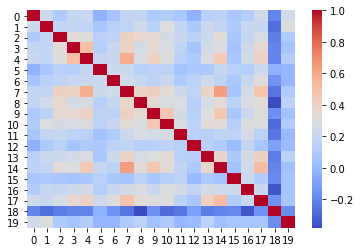

In [105]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [106]:
from sklearn.decomposition import PCA 
pca = PCA()
# find all Principal Components PC (no y!)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [107]:
# Print the PCs (as rows)
# Expressed as linear combination of initial vector basis (13 columns) 
Wt = pd.DataFrame(pca.components_)
Wt

0         1         2         3         4         5         6  \
0  -0.140186 -0.184926 -0.240804 -0.252926 -0.287320 -0.134723 -0.174600   
1   0.268055  0.374974 -0.056890 -0.137110 -0.199777 -0.211903 -0.088338   
2   0.449136  0.135664 -0.020885  0.148938  0.183560 -0.229748 -0.198901   
3   0.107070  0.109590 -0.207433 -0.048842 -0.006356  0.507592  0.495057   
4  -0.137441  0.258293  0.040232 -0.127646 -0.104184 -0.073703  0.194254   
5  -0.215815  0.248503  0.227457 -0.113918 -0.029422  0.493135 -0.296546   
6  -0.127277  0.079366 -0.397503 -0.368839 -0.245040 -0.121157 -0.119378   
7  -0.058680 -0.293863  0.175746 -0.421275 -0.109657  0.020092 -0.283989   
8  -0.038995  0.126845  0.209631 -0.221790 -0.317754  0.055481  0.354467   
9   0.531658  0.093976 -0.211103 -0.165376 -0.058251  0.084671 -0.082410   
10  0.030106 -0.140960  0.359036  0.147745 -0.152561 -0.400613  0.229201   
11  0.443919 -0.286771 -0.038722 -0.164136 -0.115254  0.093401  0.065489   
12 -0.035249 -0.550364 -0.362908  0.017038  0.109243  0.090473  0.178305   
13  0.225424 -0.141024  0.292376  0.155125 -0.292444  0.310059 -0.300349   
14 -0.085799  0.081360 -0.316554  0.382584  0.006748  0.191239 -0.318923   
15  0.186703 -0.228240  0.304980 -0.084417 -0.034524  0.185108  0.036686   
16  0.165021  0.228280 -0.033583 -0.158673  0.193561  0.078673  0.149488   
17 -0.052148  0.044884 -0.061274  0.216813 -0.360216  0.039921  0.074188   
18 -0.059759  0.040358  0.121375 -0.417338  0.517869 -0.008517 -0.100182   
19  0.015692 -0.096819  0.064233  0.018948  0.291527  0.018402  0.065467   

           7         8         9        10        11        12        13  \
0  -0.321034 -0.263726 -0.270647 -0.262472 -0.175788 -0.109969 -0.247299   
1  -0.221842  0.156009 -0.168003  0.069940  0.196732  0.011082 -0.005002   
2   0.106024 -0.067190 -0.054055 -0.130319 -0.329992 -0.362396  0.070263   
3  -0.062875 -0.105881 -0.300398 -0.128553 -0.327915 -0.016733  0.099434   
4  -0.007044 -0.060122 -0.004900  0.112157 -0.150258  0.627459  0.184016   
5  -0.044898  0.014129  0.260111  0.208784  0.045421 -0.105594 -0.214994   
6  -0.038799 -0.143453  0.170100  0.347053  0.006850 -0.228999  0.504684   
7   0.255180  0.275803 -0.150070 -0.389505 -0.183953  0.248399  0.118512   
8  -0.035274  0.429770 -0.085102 -0.083988  0.195535 -0.372822 -0.054389   
9   0.060092 -0.058516 -0.025894 -0.088988  0.486937  0.325094 -0.214721   
10 -0.167222  0.033663  0.154191 -0.007087  0.020928  0.113397  0.235386   
11 -0.141745  0.190718  0.378193  0.358105 -0.453126  0.122406 -0.192188   
12  0.026121  0.181181  0.167422 -0.021615  0.351522 -0.070466  0.086861   
13 -0.258542  0.071656 -0.016928 -0.078150  0.037503 -0.063830  0.348452   
14 -0.094655  0.264184 -0.076356 -0.060014 -0.025855  0.208371  0.290386   
15  0.158620 -0.565467 -0.203936  0.167319  0.202364 -0.024911  0.251690   
16  0.075132  0.063586  0.321041 -0.412357  0.005522 -0.080275  0.368244   
17 -0.202723 -0.338002  0.486618 -0.433346  0.023379  0.047410 -0.126375   
18 -0.284057 -0.114227  0.220749 -0.148258  0.041511  0.012477  0.020550   
19 -0.694158  0.073810 -0.217205  0.056000  0.073819  0.052210  0.071563   

          14        15        16        17        18        19  
0  -0.294705 -0.100668 -0.218285 -0.280877  0.203736 -0.095200  
1  -0.250879  0.266525  0.219986 -0.189006 -0.393903  0.392575  
2   0.117631 -0.269711 -0.285335  0.151626  0.095574  0.387644  
3  -0.098536  0.290178  0.052363  0.238806  0.104839  0.155056  
4  -0.047913 -0.537133 -0.089889 -0.061832  0.085098  0.257094  
5   0.011415  0.154407 -0.304067 -0.150262  0.242736  0.352336  
6   0.239869  0.083172  0.015092  0.195938  0.098399 -0.055341  
7   0.291267  0.207412 -0.012126  0.080537 -0.121216  0.185944  
8   0.029945 -0.320935 -0.312814  0.169519 -0.155687 -0.156227  
9   0.127476  0.027271 -0.163157  0.198163  0.325205 -0.161480  
10 -0.206286  0.434499 -0.322759  0.125438  0.336838  0.076511  
11 -0.049431 -0.001576 -0.077161 -0.1

In [108]:
Xp = pca.transform(X) # Dataset expressed/projected in the new PC basis. ( eq. X.dot(Wt.T))
pd.DataFrame(Xp)

0         1         2         3         4         5         6  \
0   -2.213021  0.445271  0.958301 -0.410016  0.711196  0.258626  1.299733   
1    1.251733  1.867256 -2.409763  0.695472 -1.454904 -0.622338  2.942800   
2   -1.010081  1.983552 -0.895440  1.875142 -1.887147 -1.428129 -1.803808   
3    1.718455 -3.000527  0.712530 -1.163883  0.084810  0.926623 -0.662489   
4   -2.925296 -0.936214 -0.413212  2.069025 -0.103659  0.529196  0.345083   
..        ...       ...       ...       ...       ...       ...       ...   
610 -2.504712  0.441989 -0.030529 -1.241100 -0.204896 -0.331570  1.166101   
611 -2.157366  1.167985 -1.929588 -0.732176 -0.030826 -0.019187 -1.006931   
612  3.827041  0.516152  0.052468  0.112953  0.740911  0.241688 -0.503953   
613  2.576276  1.880517 -1.016063 -0.410462  0.453310  0.115468  1.050656   
614  3.430787  0.839379  0.673322  0.137575 -0.076284 -0.552260 -0.563639   

            7         8         9        10        11        12        13  \
0    0.125310 -0.474782 -1.782380 -0.181508  0.144134 -0.446837  0.638844   
1    0.767253 -0.387575 -0.588701  1.006300  0.635799  0.758518  0.610205   
2   -0.799973  0.339768  0.587806  1.245652 -0.764994 -0.602932 -0.575154   
3   -0.289816 -1.528363 -0.641367  0.353478 -0.431427 -0.206179 -0.506949   
4   -0.313476  0.191871 -1.112770 -1.035282  0.654296 -0.658802  0.963650   
..        ...       ...       ...       ...       ...       ...       ...   
610 -0.880199 -0.054458 -0.219167 -0.212597 -0.272086 -0.456349  0.901786   
611  0.669957 -1.931425  1.254121  0.369067 -0.077310 -1.274246 -0.956078   
612 -1.497427 -0.279305 -1.045525 -0.155578 -0.639861 -1.246919  0.135468   
613  0.349010  0.757016  0.609468 -1.725829 -1.015087  0.276201  0.222300   
614 -1.485165 -1.625416 -0.269012 -1.106815 -0.658214  2.187957 -0.925315   

           14        15        16        17        18        19  
0   -0.104658 -0.558679 -0.284523 -0.001015 -0.269409 -0.463053  
1    0.707273 -0.651250 -0.283416 -0.253107  1.047504 -0.407375  
2   -0.489223 -0.330361  0.331006 -0.575318  0.600113 -0.486412  
3   -1.094650  0.136159  1.290917  0.229626 -0.758292 -0.055327  
4    0.305438  0.031411  1.083788  0.048490  0.063462 -0.170351  
..        ...       ...       ...       ...       ...       ...  
610  0.183683 -0.132123  0.243031 -0.321892  0.484474  0.401927  
611  0.284088 -0.564378 -0.123912 -0.240919 -0.318756  0.088676  
612  0.760329  0.343325  0.346242  0.684434 -0.666887 -0.143197  
613 -0.894421 -1.499858  0.787291  0.015411 -0.879905  1.191616  
614  1.112360  0.714954  0.157729  0.344568  0.200096  0.750712  

[615 rows x 20 columns]

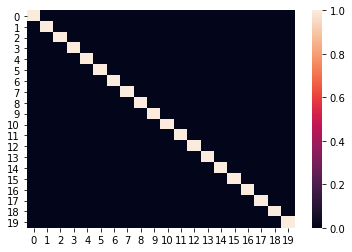

In [109]:
# As expected, the PCA reduces multicolinearity to its maximum! # (to the detriment of interpretability) 
sns.heatmap(pd.DataFrame(Xp).corr())

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df = pd.DataFrame()
df["vif_index"] = [vif(Xp, i) for i in range(Xp.shape[1])]
df

vif_index
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        1.0
17        1.0
18        1.0
19        1.0

In [111]:
# Let's compute it
df_Xp = pd.DataFrame(Xp)
df_Xp.std()**2 / ((df_Xp.std()**2).sum())

0     0.268140
1     0.077660
2     0.066548
3     0.055096
4     0.050917
5     0.045090
6     0.043783
7     0.041951
8     0.040801
9     0.038779
10    0.036698
11    0.033054
12    0.032092
13    0.030779
14    0.029182
15    0.028337
16    0.024559
17    0.022839
18    0.018849
19    0.014844
dtype: float64

In [112]:
# Sklearn provides it automatically 
pca.explained_variance_ratio_

array([0.2681401 , 0.07766042, 0.06654843, 0.05509643, 0.05091698,
       0.04509005, 0.04378284, 0.04195126, 0.04080096, 0.0387786 ,
       0.03669793, 0.03305412, 0.03209223, 0.03077926, 0.02918208,
       0.02833679, 0.02455893, 0.02283915, 0.01884914, 0.0148443 ])

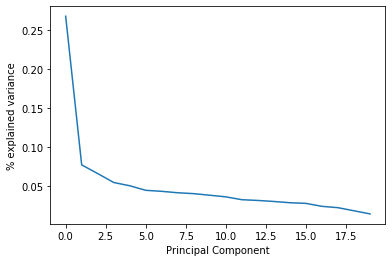

In [113]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [114]:
# Find principal components
eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T,X))

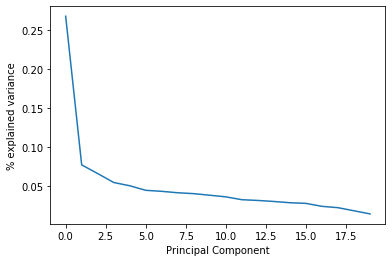

In [115]:
# Compute share of explained variance per component 
tot = sum(eig_vals)
share_of_variances = [(i / tot) for i in sorted(eig_vals, reverse=True)] 
plt.plot(share_of_variances); 
plt.xlabel('Principal Component'); 
plt.ylabel ('% explained variance');

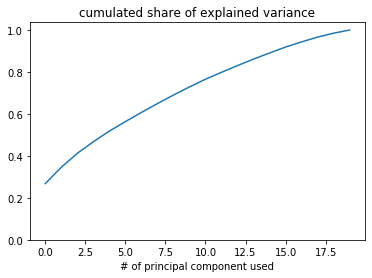

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance') 
plt.xlabel('# of principal component used');

In [117]:
pca.components_

array([[-0.14018593, -0.18492633, -0.2408038 , -0.25292644, -0.28732027,
        -0.13472344, -0.17459956, -0.32103408, -0.26372605, -0.27064654,
        -0.26247221, -0.17578806, -0.10996895, -0.24729885, -0.29470467,
        -0.10066753, -0.21828498, -0.28087717,  0.20373644, -0.09520001],
       [ 0.26805488,  0.37497378, -0.05688994, -0.13711039, -0.19977696,
        -0.21190323, -0.08833753, -0.22184248,  0.15600868, -0.16800313,
         0.06993979,  0.19673218,  0.01108238, -0.00500242, -0.25087891,
         0.26652529,  0.2199858 , -0.18900572, -0.39390296,  0.39257478],
       [ 0.44913641,  0.13566396, -0.02088497,  0.14893762,  0.18355955,
        -0.2297484 , -0.19890124,  0.1060236 , -0.06718958, -0.05405491,
        -0.13031938, -0.32999209, -0.36239553,  0.07026267,  0.1176309 ,
        -0.2697109 , -0.28533529,  0.15162648,  0.09557376,  0.38764444],
       [ 0.1070702 ,  0.10958955, -0.20743321, -0.04884249, -0.00635638,
         0.50759207,  0.49505662, -0.06287453, -

In [118]:
pca2 = PCA(n_components=2).fit(X) # Print our 2 principal components
pd.DataFrame(pca2.components_)

0         1         2         3         4         5         6  \
0 -0.140182 -0.184939 -0.240813 -0.252907 -0.287331 -0.134745 -0.174596   
1  0.266763  0.380989 -0.058882 -0.141547 -0.199106 -0.198414 -0.091356   

          7         8         9        10        11        12        13  \
0 -0.321050 -0.263726 -0.270644 -0.262462 -0.175796 -0.109963 -0.247272   
1 -0.218029  0.164013 -0.164731  0.065799  0.206550  0.005431 -0.017035   

         14        15        16        17        18        19  
0 -0.294719 -0.100656 -0.218287 -0.280863  0.203732 -0.095212  
1 -0.246530  0.254364  0.215499 -0.193440 -0.388972  0.404110

In [119]:
Xp2 = pca2.fit_transform(X)
pd.DataFrame(Xp2)

0         1
0   -2.213117  0.430827
1    1.251729  1.876022
2   -1.010101  1.982103
3    1.718487 -3.006433
4   -2.925469 -0.958753
..        ...       ...
610 -2.504854  0.423451
611 -2.157526  1.126609
612  3.826939  0.497048
613  2.576293  1.863167
614  3.431093  0.880080

[615 rows x 2 columns]

In [120]:
X_reconstructed = pca2.inverse_transform(Xp2) 
X_reconstructed.shape

(615, 20)

In [121]:
pca3 = PCA(n_components=3).fit(X) # Print our 3 principal components
pd.DataFrame(pca3.components_)

0         1         2         3         4         5         6  \
0 -0.140183 -0.184926 -0.240798 -0.252913 -0.287318 -0.134723 -0.174589   
1  0.266763  0.374375 -0.058915 -0.144765 -0.200266 -0.212788 -0.092616   
2  0.449696  0.136368 -0.019401  0.144184  0.183587 -0.232251 -0.199050   

          7         8         9        10        11        12        13  \
0 -0.321041 -0.263736 -0.270642 -0.262463 -0.175781 -0.109972 -0.247314   
1 -0.218256  0.157886 -0.171230  0.067584  0.192941  0.013143  0.002173   
2  0.110193 -0.073427 -0.057578 -0.128324 -0.333278 -0.361957  0.072733   

         14        15        16        17        18        19  
0 -0.294713 -0.100671 -0.218290 -0.280880  0.203735 -0.095196  
1 -0.246746  0.269843  0.221495 -0.187780 -0.394945  0.390428  
2  0.121350 -0.266211 -0.283433  0.149982  0.093537  0.385851

In [122]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


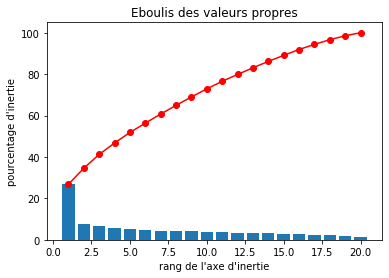

In [123]:
display_scree_plot(pca)

In [124]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(30,30))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey", alpha = 0.5)
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

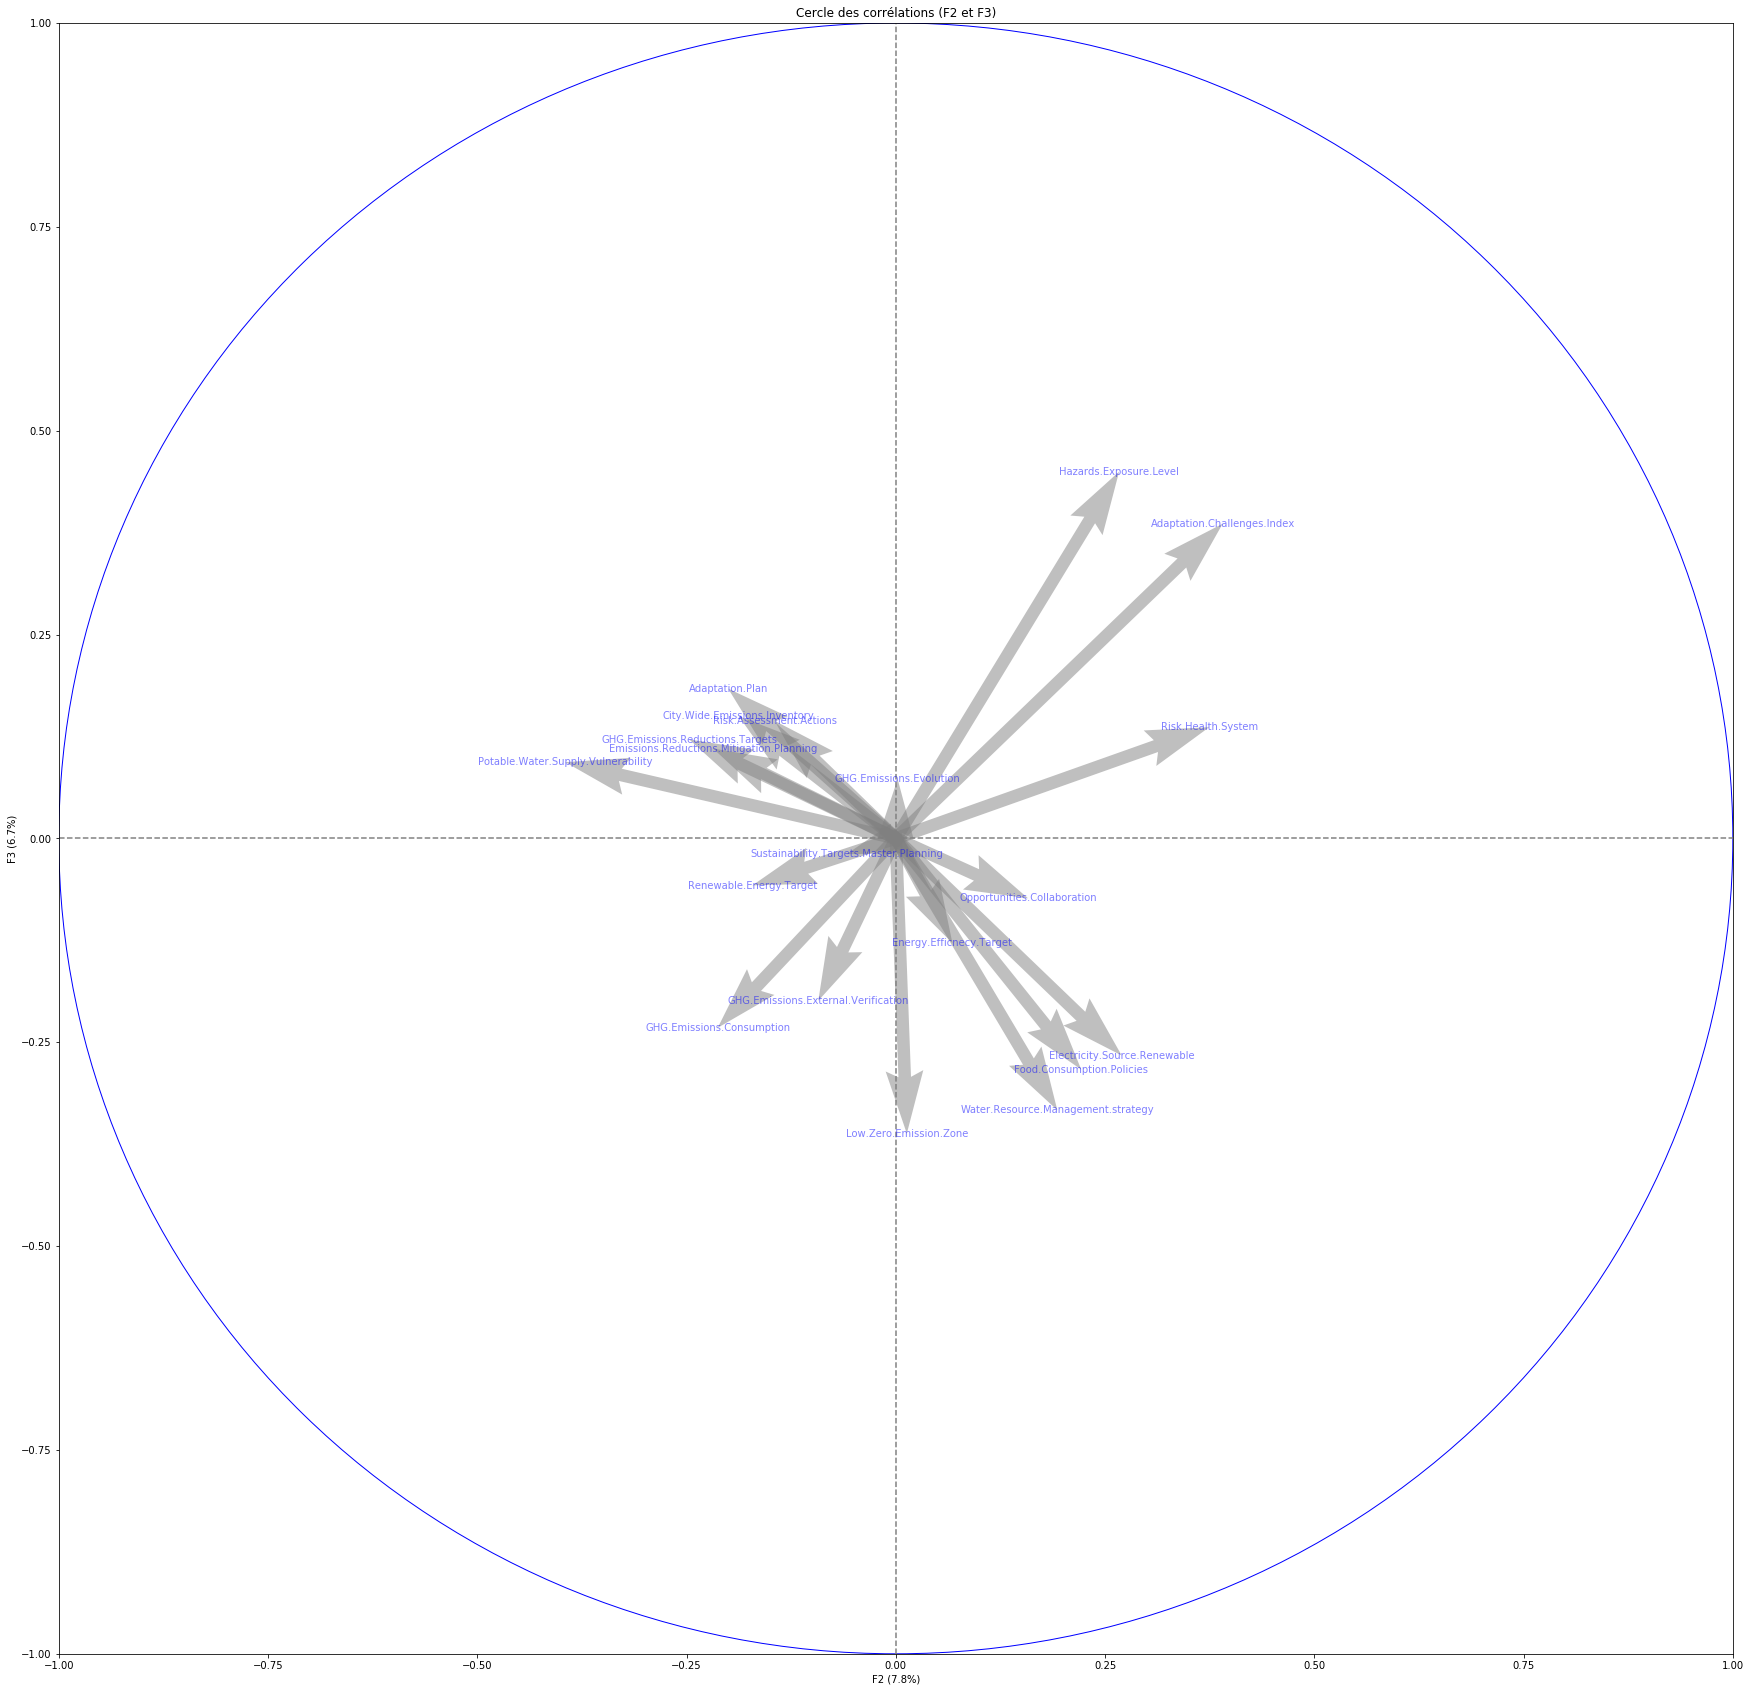

In [125]:
# Cercle des corrélations
n_comp = 3
pcs = pca3.components_
display_circles(pcs, n_comp, pca3, [(1,2)], labels = np.array(df_pca_mod.columns))

## Test GAETAN

In [126]:
scaler = StandardScaler()
Z = scaler.fit_transform(df_pca_mod)

In [127]:
acp = PCA(svd_solver='full')

In [128]:
#nombre d'observations
n = df_pca_mod.shape[0]
#nombre de variables
p = df_pca_mod.shape[1]
coord = acp.fit_transform(Z)
eigval = (n-1)/n*acp.explained_variance_

In [129]:
bs = 1/np.arange(p,0,-1) 
bs = np.cumsum(bs)
bs = bs[::-1]

In [130]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0     5.362802  3.597740
1     1.553208  2.597740
2     1.330969  2.097740
3     1.101929  1.764406
4     1.018340  1.514406
5     0.901801  1.314406
6     0.875657  1.147740
7     0.839025  1.004883
8     0.816019  0.879883
9     0.775572  0.768771
10    0.733959  0.668771
11    0.661082  0.577862
12    0.641845  0.494529
13    0.615585  0.417606
14    0.583642  0.346177
15    0.566736  0.279511
16    0.491179  0.217011
17    0.456783  0.158187
18    0.376983  0.102632
19    0.296886  0.050000


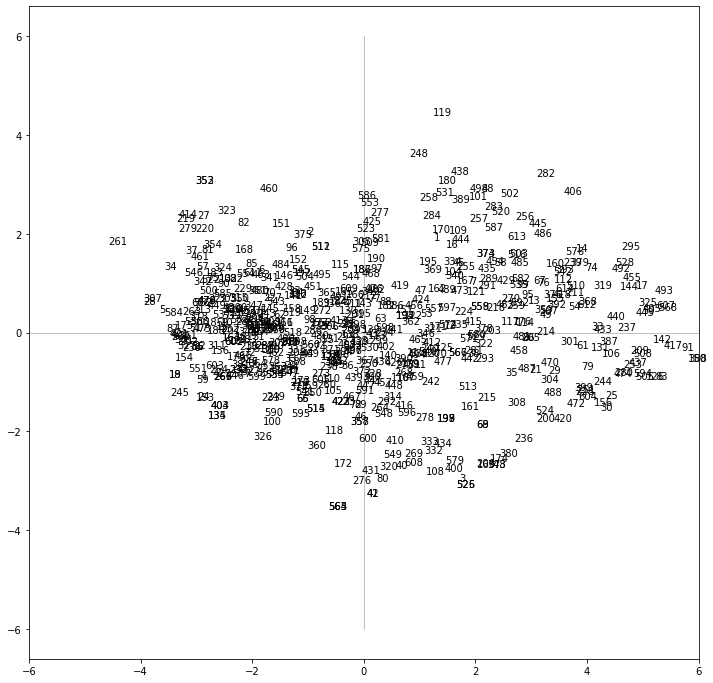

In [131]:
fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6) #même limites en abscisse axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n): 
    plt.annotate(df_pca_mod.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1) 
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [132]:
acp.explained_variance_ratio_

array([0.2681401 , 0.07766042, 0.06654843, 0.05509643, 0.05091698,
       0.04509005, 0.04378284, 0.04195126, 0.04080096, 0.0387786 ,
       0.03669793, 0.03305412, 0.03209223, 0.03077926, 0.02918208,
       0.02833679, 0.02455893, 0.02283915, 0.01884914, 0.0148443 ])

In [133]:
print(acp.n_components_)

20


In [134]:
di = np.sum(Z**2,axis=1)

In [135]:
cos2 = coord**2 
for j in range(p):
    #print(j)
    cos2[:,j] = cos2[:,j]/di 
print(pd.DataFrame({'id':df_pca_mod.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2]}))

      id    COS2_1    COS2_2    COS2_3
0      0  0.370607  0.015003  0.069494
1      1  0.055384  0.123245  0.205264
2      2  0.043517  0.167816  0.034199
3      3  0.133750  0.407767  0.022994
4      4  0.431416  0.044188  0.008608
..   ...       ...       ...       ...
610  610  0.518542  0.016147  0.000077
611  611  0.229191  0.067178  0.183350
612  612  0.637923  0.011604  0.000120
613  613  0.279322  0.148824  0.043447
614  614  0.416013  0.024902  0.016024

[615 rows x 4 columns]


In [136]:
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j]) 
print(pd.DataFrame({'id':df_pca_mod.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

      id     CTR_1     CTR_2
0      0  0.001485  0.000208
1      1  0.000475  0.003650
2      2  0.000309  0.004119
3      3  0.000895  0.009425
4      4  0.002595  0.000918
..   ...       ...       ...
610  610  0.001902  0.000205
611  611  0.001411  0.001428
612  612  0.004441  0.000279
613  613  0.002012  0.003702
614  614  0.003569  0.000738

[615 rows x 3 columns]


In [137]:
sqrt_eigval = np.sqrt(eigval)

In [138]:
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[-0.32463871  0.33407087  0.51815793  0.11239457 -0.13869587 -0.20494462
  -0.11910174 -0.05374986 -0.03522551  0.46821287  0.02579254  0.36093694
  -0.02823971  0.17686608 -0.06554747  0.14055366  0.11565363 -0.03524454
  -0.03669148  0.0085504 ]
 [-0.4282473   0.46732152  0.15651227  0.1150392   0.26065115  0.23598665
   0.07426799 -0.26917377  0.11458364  0.0827617  -0.12076209 -0.23316457
  -0.44092514 -0.11064629  0.06215651 -0.17182304  0.15998832  0.03033488
   0.02477952 -0.05275411]
 [-0.5576468  -0.07090067 -0.02409448 -0.21774842  0.04059921  0.21600066
  -0.3719697   0.1609805   0.18936768 -0.18591121  0.30759131 -0.03148386
  -0.29074425  0.22939587 -0.24183583  0.22959496 -0.0235367  -0.04141277
   0.07452309  0.03499904]
 [-0.58572009 -0.17087765  0.17182578 -0.05127133 -0.12881113 -0.10817976
  -0.34514632 -0.38588125 -0.20035095 -0.14564113  0.12657535 -0.13345434
   0.01365003  0.12171012  0.29228053 -0.0635507  -0.11120429  0.14653471
  -0.25624122  0.01032436]
 [-0

In [139]:
#Corrélation des variables avec les axes
cor_pca = pd.DataFrame({'id':df_pca_mod.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1], 'COR_3':corvar[:,2]})

In [140]:
cos2var = corvar**2 
# Qualité de représentation des variables
cos2var_pca = pd.DataFrame({'id':df_pca_mod.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1], 'COS2_3':cos2var[:,2]})

In [141]:
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#Contribution des variables aux axes
contri = pd.DataFrame({'id':df_pca_mod.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1], 'CTR_3':ctrvar[:,2]})

In [142]:
contri['sum'] = contri['CTR_1']+contri['CTR_2']+contri['CTR_3']

In [143]:
contri

id     CTR_1     CTR_2     CTR_3  \
0                     Hazards.Exposure.Level  0.019652  0.071853  0.201724   
1                         Risk.Health.System  0.034198  0.140605  0.018405   
2     Sustainability.Targets.Master.Planning  0.057986  0.003236  0.000436   
3                    Risk.Assessment.Actions  0.063972  0.018799  0.022182   
4                            Adaptation.Plan  0.082553  0.039911  0.033694   
5                  GHG.Emissions.Consumption  0.018150  0.044903  0.052784   
6        GHG.Emissions.External.Verification  0.030485  0.007804  0.039562   
7   Emissions.Reductions.Mitigation.Planning  0.103063  0.049214  0.011241   
8                Opportunities.Collaboration  0.069551  0.024339  0.004514   
9                    Renewable.Energy.Target  0.073250  0.028225  0.002922   
10                   Energy.Efficnecy.Target  0.068892  0.004892  0.016983   
11        Water.Resource.Management.strategy  0.030901  0.038704  0.108895   
12                    Low.Zero.Emission.Zone  0.012093  0.000123  0.131331   
13                   GHG.Emissions.Evolution  0.061157  0.000025  0.004937   
14          GHG.Emissions.Reductions.Targets  0.086851  0.062940  0.013837   
15              Electricity.Source.Renewable  0.010134  0.071036  0.072744   
16                 Food.Consumption.Policies  0.047648  0.048394  0.081416   
17             City.Wide.Emissions.Inventory  0.078892  0.035723  0.022991   
18        Potable.Water.Supply.Vulnerability  0.041509  0.155160  0.009134   
19               Adaptation.Challenges.Index  0.009063  0.154115  0.150268   

         sum  
0   0.293229  
1   0.193208  
2   0.061659  
3   0.104953  
4   0.156158  
5   0.115838  
6   0.077850  
7   0.163518  
8   0.098405  
9   0.104397  
10  0.090766  
11  0.178500  
12  0.143547  
13  0.066119  
14  0.163628  
15  0.153914  
16  0.177458  
17  0.137606  
18  0.205802  
19  0.313446

In [144]:
sum_contri = pd.DataFrame(contri['sum'].rank(ascending = False))
sum_contri.index = contri.id
sum_contri

sum
id                                            
Hazards.Exposure.Level                     2.0
Risk.Health.System                         4.0
Sustainability.Targets.Master.Planning    20.0
Risk.Assessment.Actions                   14.0
Adaptation.Plan                            9.0
GHG.Emissions.Consumption                 13.0
GHG.Emissions.External.Verification       18.0
Emissions.Reductions.Mitigation.Planning   8.0
Opportunities.Collaboration               16.0
Renewable.Energy.Target                   15.0
Energy.Efficnecy.Target                   17.0
Water.Resource.Management.strategy         5.0
Low.Zero.Emission.Zone                    11.0
GHG.Emissions.Evolution                   19.0
GHG.Emissions.Reductions.Targets           7.0
Electricity.Source.Renewable              10.0
Food.Consumption.Policies                  6.0
City.Wide.Emissions.Inventory             12.0
Potable.Water.Supply.Vulnerability         3.0
Adaptation.Challenges.Index                1.0

In [145]:
rank_contri = pd.concat([contri['CTR_1'].rank(ascending = False),contri['CTR_2'].rank(ascending = False),contri['CTR_3'].rank(ascending = False)], axis = 1)
rank_contri.index = contri.id
rank_contri

CTR_1  CTR_2  CTR_3
id                                                           
Hazards.Exposure.Level                     16.0    4.0    1.0
Risk.Health.System                         13.0    3.0   12.0
Sustainability.Targets.Master.Planning     10.0   18.0   20.0
Risk.Assessment.Actions                     8.0   15.0   11.0
Adaptation.Plan                             3.0   10.0    9.0
GHG.Emissions.Consumption                  17.0    9.0    7.0
GHG.Emissions.External.Verification        15.0   16.0    8.0
Emissions.Reductions.Mitigation.Planning    1.0    7.0   15.0
Opportunities.Collaboration                 6.0   14.0   18.0
Renewable.Energy.Target                     5.0   13.0   19.0
Energy.Efficnecy.Target                     7.0   17.0   13.0
Water.Resource.Management.strategy         14.0   11.0    4.0
Low.Zero.Emission.Zone                     18.0   19.0    3.0
GHG.Emissions.Evolution                     9.0   20.0   17.0
GHG.Emissions.Reductions.Targets            2.0    6.0   14.0
Electricity.Source.Renewable               19.0    5.0    6.0
Food.Consumption.Policies                  11.0    8.0    5.0
City.Wide.Emissions.Inventory               4.0   12.0   10.0
Potable.Water.Supply.Vulnerability         12.0    1.0   16.0
Adaptation.Challenges.Index                20.0    2.0    2.0

In [146]:
rank_contri[rank_contri.CTR_1<11][rank_contri.CTR_2<11]

/Users/utilisateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



CTR_1  CTR_2  CTR_3
id                                                           
Adaptation.Plan                             3.0   10.0    9.0
Emissions.Reductions.Mitigation.Planning    1.0    7.0   15.0
GHG.Emissions.Reductions.Targets            2.0    6.0   14.0

In [147]:
rank_contri[rank_contri.CTR_1<11][rank_contri.CTR_3<11]

/Users/utilisateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



CTR_1  CTR_2  CTR_3
id                                                
Adaptation.Plan                  3.0   10.0    9.0
City.Wide.Emissions.Inventory    4.0   12.0   10.0

In [148]:
rank_cor = pd.concat([cor_pca['COR_1'].rank(ascending = False),cor_pca['COR_2'].rank(ascending = False),cor_pca['COR_3'].rank(ascending = False)], axis = 1)
rank_cor.index = cor_pca.id
rank_cor

COR_1  COR_2  COR_3
id                                                           
Hazards.Exposure.Level                      6.0    3.0    1.0
Risk.Health.System                          9.0    2.0    6.0
Sustainability.Targets.Master.Planning     11.0   11.0   11.0
Risk.Assessment.Actions                    13.0   13.0    5.0
Adaptation.Plan                            18.0   16.0    3.0
GHG.Emissions.Consumption                   5.0   17.0   16.0
GHG.Emissions.External.Verification         7.0   12.0   15.0
Emissions.Reductions.Mitigation.Planning   20.0   18.0    8.0
Opportunities.Collaboration                15.0    7.0   13.0
Renewable.Energy.Target                    16.0   14.0   12.0
Energy.Efficnecy.Target                    14.0    8.0   14.0
Water.Resource.Management.strategy          8.0    6.0   19.0
Low.Zero.Emission.Zone                      4.0    9.0   20.0
GHG.Emissions.Evolution                    12.0   10.0   10.0
GHG.Emissions.Reductions.Targets           19.0   19.0    7.0
Electricity.Source.Renewable                3.0    4.0   17.0
Food.Consumption.Policies                  10.0    5.0   18.0
City.Wide.Emissions.Inventory              17.0   15.0    4.0
Potable.Water.Supply.Vulnerability          1.0   20.0    9.0
Adaptation.Challenges.Index                 2.0    1.0    2.0

In [149]:
rank_co2var = pd.concat([cos2var_pca['COS2_1'].rank(ascending = False),cos2var_pca['COS2_2'].rank(ascending = False),cos2var_pca['COS2_3'].rank(ascending = False)], axis = 1)
rank_co2var.index = cos2var_pca.id
rank_co2var

COS2_1  COS2_2  COS2_3
id                                                              
Hazards.Exposure.Level                      16.0     4.0     1.0
Risk.Health.System                          13.0     3.0    12.0
Sustainability.Targets.Master.Planning      10.0    18.0    20.0
Risk.Assessment.Actions                      8.0    15.0    11.0
Adaptation.Plan                              3.0    10.0     9.0
GHG.Emissions.Consumption                   17.0     9.0     7.0
GHG.Emissions.External.Verification         15.0    16.0     8.0
Emissions.Reductions.Mitigation.Planning     1.0     7.0    15.0
Opportunities.Collaboration                  6.0    14.0    18.0
Renewable.Energy.Target                      5.0    13.0    19.0
Energy.Efficnecy.Target                      7.0    17.0    13.0
Water.Resource.Management.strategy          14.0    11.0     4.0
Low.Zero.Emission.Zone                      18.0    19.0     3.0
GHG.Emissions.Evolution                      9.0    20.0    17.0
GHG.Emissions.Reductions.Targets             2.0     6.0    14.0
Electricity.Source.Renewable                19.0     5.0     6.0
Food.Consumption.Policies                   11.0     8.0     5.0
City.Wide.Emissions.Inventory                4.0    12.0    10.0
Potable.Water.Supply.Vulnerability          12.0     1.0    16.0
Adaptation.Challenges.Index                 20.0     2.0     2.0

In [150]:
contri

id     CTR_1     CTR_2     CTR_3  \
0                     Hazards.Exposure.Level  0.019652  0.071853  0.201724   
1                         Risk.Health.System  0.034198  0.140605  0.018405   
2     Sustainability.Targets.Master.Planning  0.057986  0.003236  0.000436   
3                    Risk.Assessment.Actions  0.063972  0.018799  0.022182   
4                            Adaptation.Plan  0.082553  0.039911  0.033694   
5                  GHG.Emissions.Consumption  0.018150  0.044903  0.052784   
6        GHG.Emissions.External.Verification  0.030485  0.007804  0.039562   
7   Emissions.Reductions.Mitigation.Planning  0.103063  0.049214  0.011241   
8                Opportunities.Collaboration  0.069551  0.024339  0.004514   
9                    Renewable.Energy.Target  0.073250  0.028225  0.002922   
10                   Energy.Efficnecy.Target  0.068892  0.004892  0.016983   
11        Water.Resource.Management.strategy  0.030901  0.038704  0.108895   
12                    Low.Zero.Emission.Zone  0.012093  0.000123  0.131331   
13                   GHG.Emissions.Evolution  0.061157  0.000025  0.004937   
14          GHG.Emissions.Reductions.Targets  0.086851  0.062940  0.013837   
15              Electricity.Source.Renewable  0.010134  0.071036  0.072744   
16                 Food.Consumption.Policies  0.047648  0.048394  0.081416   
17             City.Wide.Emissions.Inventory  0.078892  0.035723  0.022991   
18        Potable.Water.Supply.Vulnerability  0.041509  0.155160  0.009134   
19               Adaptation.Challenges.Index  0.009063  0.154115  0.150268   

         sum  
0   0.293229  
1   0.193208  
2   0.061659  
3   0.104953  
4   0.156158  
5   0.115838  
6   0.077850  
7   0.163518  
8   0.098405  
9   0.104397  
10  0.090766  
11  0.178500  
12  0.143547  
13  0.066119  
14  0.163628  
15  0.153914  
16  0.177458  
17  0.137606  
18  0.205802  
19  0.313446

In [151]:
cor_pca['sum'] = cor_pca['COR_1']+cor_pca['COR_2']+cor_pca['COR_3']

In [152]:
sum_cor_pca = pd.DataFrame(cor_pca['sum'].rank(ascending = False))
sum_cor_pca.index = cor_pca.id
sum_cor_pca

sum
id                                            
Hazards.Exposure.Level                     2.0
Risk.Health.System                         3.0
Sustainability.Targets.Master.Planning    11.0
Risk.Assessment.Actions                   10.0
Adaptation.Plan                           14.0
GHG.Emissions.Consumption                 17.0
GHG.Emissions.External.Verification       16.0
Emissions.Reductions.Mitigation.Planning  19.0
Opportunities.Collaboration                6.0
Renewable.Energy.Target                   20.0
Energy.Efficnecy.Target                   13.0
Water.Resource.Management.strategy         8.0
Low.Zero.Emission.Zone                    12.0
GHG.Emissions.Evolution                    7.0
GHG.Emissions.Reductions.Targets          18.0
Electricity.Source.Renewable               5.0
Food.Consumption.Policies                  9.0
City.Wide.Emissions.Inventory             15.0
Potable.Water.Supply.Vulnerability         4.0
Adaptation.Challenges.Index                1.0

In [153]:
cos2var_pca['sum']=cos2var_pca['COS2_1']+cos2var_pca['COS2_2']+cos2var_pca['COS2_3']

In [154]:
sum_cos2var_pca = pd.DataFrame(cos2var_pca['sum'].rank(ascending = False))
sum_cos2var_pca.index = cos2var_pca.id
sum_cos2var_pca

sum
id                                            
Hazards.Exposure.Level                     6.0
Risk.Health.System                        10.0
Sustainability.Targets.Master.Planning    16.0
Risk.Assessment.Actions                   12.0
Adaptation.Plan                            3.0
GHG.Emissions.Consumption                 19.0
GHG.Emissions.External.Verification       20.0
Emissions.Reductions.Mitigation.Planning   1.0
Opportunities.Collaboration               11.0
Renewable.Energy.Target                    8.0
Energy.Efficnecy.Target                   13.0
Water.Resource.Management.strategy        14.0
Low.Zero.Emission.Zone                    18.0
GHG.Emissions.Evolution                   15.0
GHG.Emissions.Reductions.Targets           2.0
Electricity.Source.Renewable              17.0
Food.Consumption.Policies                  9.0
City.Wide.Emissions.Inventory              4.0
Potable.Water.Supply.Vulnerability         7.0
Adaptation.Challenges.Index                5.0

## Suite moi

In [155]:
test_pca3 = pd.DataFrame(pca3.components_, columns =df_pca_mod.columns )

In [156]:
test_pca3.T

0         1         2
Hazards.Exposure.Level                   -0.140183  0.266763  0.449696
Risk.Health.System                       -0.184926  0.374375  0.136368
Sustainability.Targets.Master.Planning   -0.240798 -0.058915 -0.019401
Risk.Assessment.Actions                  -0.252913 -0.144765  0.144184
Adaptation.Plan                          -0.287318 -0.200266  0.183587
GHG.Emissions.Consumption                -0.134723 -0.212788 -0.232251
GHG.Emissions.External.Verification      -0.174589 -0.092616 -0.199050
Emissions.Reductions.Mitigation.Planning -0.321041 -0.218256  0.110193
Opportunities.Collaboration              -0.263736  0.157886 -0.073427
Renewable.Energy.Target                  -0.270642 -0.171230 -0.057578
Energy.Efficnecy.Target                  -0.262463  0.067584 -0.128324
Water.Resource.Management.strategy       -0.175781  0.192941 -0.333278
Low.Zero.Emission.Zone                   -0.109972  0.013143 -0.361957
GHG.Emissions.Evolution                  -0.247314  0.002173  0.072733
GHG.Emissions.Reductions.Targets         -0.294713 -0.246746  0.121350
Electricity.Source.Renewable             -0.100671  0.269843 -0.266211
Food.Consumption.Policies                -0.218290  0.221495 -0.283433
City.Wide.Emissions.Inventory            -0.280880 -0.187780  0.149982
Potable.Water.Supply.Vulnerability        0.203735 -0.394945  0.093537
Adaptation.Challenges.Index              -0.095196  0.390428  0.385851

In [157]:
np.abs(test_pca3.T)

0         1         2
Hazards.Exposure.Level                    0.140183  0.266763  0.449696
Risk.Health.System                        0.184926  0.374375  0.136368
Sustainability.Targets.Master.Planning    0.240798  0.058915  0.019401
Risk.Assessment.Actions                   0.252913  0.144765  0.144184
Adaptation.Plan                           0.287318  0.200266  0.183587
GHG.Emissions.Consumption                 0.134723  0.212788  0.232251
GHG.Emissions.External.Verification       0.174589  0.092616  0.199050
Emissions.Reductions.Mitigation.Planning  0.321041  0.218256  0.110193
Opportunities.Collaboration               0.263736  0.157886  0.073427
Renewable.Energy.Target                   0.270642  0.171230  0.057578
Energy.Efficnecy.Target                   0.262463  0.067584  0.128324
Water.Resource.Management.strategy        0.175781  0.192941  0.333278
Low.Zero.Emission.Zone                    0.109972  0.013143  0.361957
GHG.Emissions.Evolution                   0.247314  0.002173  0.072733
GHG.Emissions.Reductions.Targets          0.294713  0.246746  0.121350
Electricity.Source.Renewable              0.100671  0.269843  0.266211
Food.Consumption.Policies                 0.218290  0.221495  0.283433
City.Wide.Emissions.Inventory             0.280880  0.187780  0.149982
Potable.Water.Supply.Vulnerability        0.203735  0.394945  0.093537
Adaptation.Challenges.Index               0.095196  0.390428  0.385851

In [158]:
q_p0 = pd.DataFrame(pd.qcut(np.abs(test_pca3.T)[0], 5, labels = False))
q_p1 = pd.DataFrame(pd.qcut(np.abs(test_pca3.T)[1], 5, labels = False))
q_p2 = pd.DataFrame(pd.qcut(np.abs(test_pca3.T)[2], 5, labels = False))

In [159]:
quintile = []
for i in q_p1.index:
    if q_p1.loc[i][1]== 4:
        quintile.append(q_p1.loc[i])
    if q_p0.loc[i][0]== 4:
        quintile.append(q_p0.loc[i])
    if q_p2.loc[i][2]== 4:
        quintile.append(q_p2.loc[i])

In [160]:
quintile

[2    4
 Name: Hazards.Exposure.Level, dtype: int64,
 1    4
 Name: Risk.Health.System, dtype: int64,
 0    4
 Name: Adaptation.Plan, dtype: int64,
 0    4
 Name: Emissions.Reductions.Mitigation.Planning, dtype: int64,
 2    4
 Name: Water.Resource.Management.strategy, dtype: int64,
 2    4
 Name: Low.Zero.Emission.Zone, dtype: int64,
 0    4
 Name: GHG.Emissions.Reductions.Targets, dtype: int64,
 1    4
 Name: Electricity.Source.Renewable, dtype: int64,
 0    4
 Name: City.Wide.Emissions.Inventory, dtype: int64,
 1    4
 Name: Potable.Water.Supply.Vulnerability, dtype: int64,
 1    4
 Name: Adaptation.Challenges.Index, dtype: int64,
 2    4
 Name: Adaptation.Challenges.Index, dtype: int64]

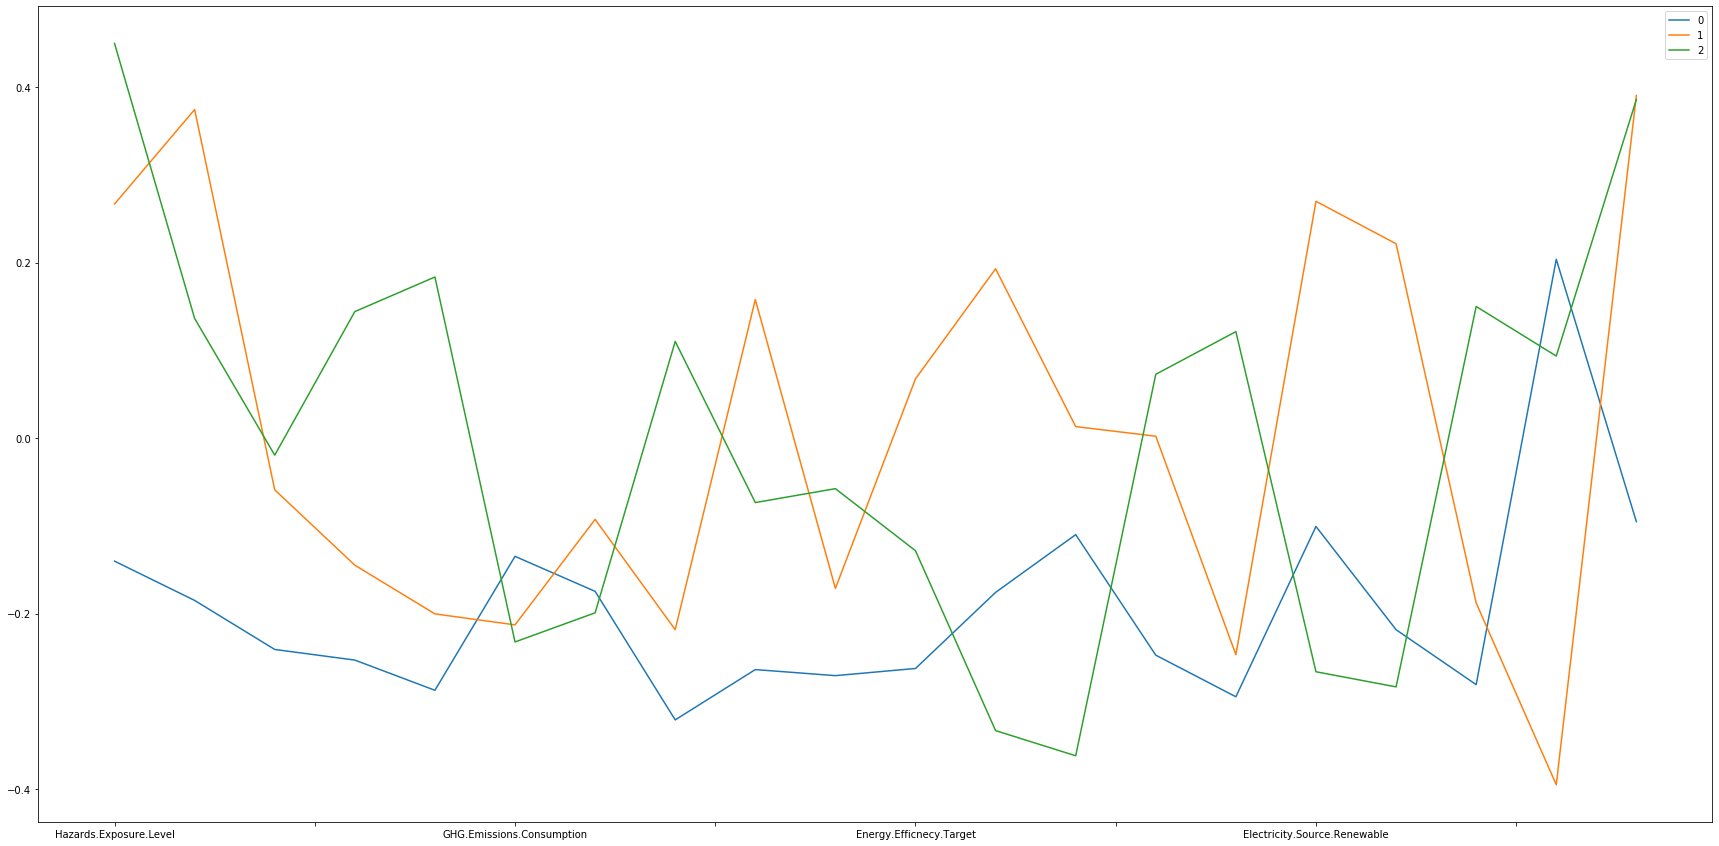

In [161]:
test_pca3.T.plot(figsize = (30,15))

In [162]:
df_pca_mod.columns[11]

'Water.Resource.Management.strategy'

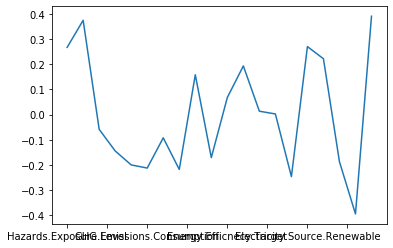

In [163]:
test_pca3.iloc[1].plot()

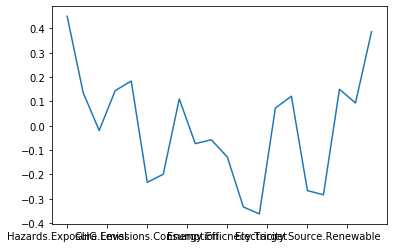

In [164]:
test_pca3.iloc[2].plot()

### TEST NICO

In [165]:
X_dummy = df_pca_mod.copy()
y_dummy1 = raw_index['City.Readiness.Index']
y_dummy2 = raw_index['Vulnerability']

In [166]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

In [167]:
estimator1 = SVR(kernel="linear")
selector1 = RFECV(estimator1, step=1, cv=5)
selector1 = selector1.fit(X_dummy, y_dummy1)
selector1.support_

array([False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False])

In [168]:
selector1.ranking_

array([9, 5, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 7, 1, 1, 8, 6])

In [169]:
selector1.n_features_

12

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(selector1.grid_scores_) + min_features_to_select),
         selector1.grid_scores_)
plt.show()

In [170]:
estimator2 = SVR(kernel="linear")
selector2 = RFECV(estimator2, step=1, cv=5)
selector2 = selector2.fit(X_dummy, y_dummy2)
selector2.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [171]:
selector2.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [172]:
selector2.n_features_

20

### TEST NICO 2

In [173]:
X_dummy = df_pca_mod.copy()
y_dummy1 = raw_index['City.Readiness.Index']
y_dummy2 = raw_index['Vulnerability']

In [174]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import r2_score

In [175]:
from sklearn.metrics import make_scorer

In [192]:
# Create the RFE object and compute a cross-validated score.
svr = SVR(kernel="linear")

In [199]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svr, step=1, cv=10,
              min_features_to_select=min_features_to_select)
rfecv.fit(X_dummy, y_dummy1)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 12


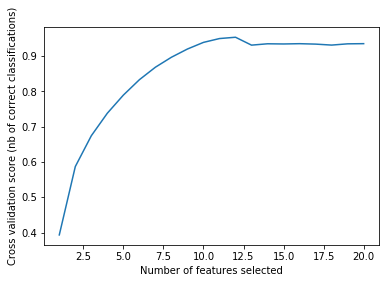

In [200]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [219]:
rfecv.ranking_

array([9, 5, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 4, 1, 1, 7, 1, 1, 8, 6])

In [202]:
rfecv.support_

array([False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False])

In [205]:
rfecv.support_

array([False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False])

In [204]:
rfecv.grid_scores_

array([0.39317915, 0.58678507, 0.67407037, 0.73785346, 0.78909837,
       0.83267664, 0.86809723, 0.89632917, 0.91960939, 0.93839118,
       0.94924427, 0.95295222, 0.93060276, 0.93443857, 0.93390645,
       0.93471712, 0.93349466, 0.93074505, 0.93429571, 0.93477684])

In [233]:
rank_nico = pd.concat([pd.Series(X_dummy.columns),pd.Series(rfecv.ranking_)], axis = 1)
rrank = rank_nico.sort_values(1)

<BarContainer object of 20 artists>

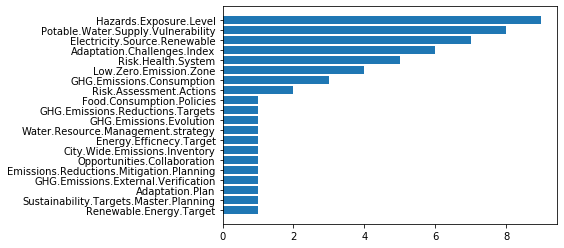

In [234]:
plt.barh(rrank[0], rrank[1])

In [ ]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring= r2_score(y_true, y_pred),
              min_features_to_select=min_features_to_select)
rfecv.fit(X_dummy, y_dummy2)

print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()